# Introdução

Nesse projeto iremos ensinar a máquina a identificar duas raças de gatos, Ragdoll e Bengal, e duas de cachorros, Pug e American Bulldog. As imagens para separação estão presentes no seguinte link: cats_and_dogs_images.

# Primeira atividade( HOG, KNN e PCA)

Conexão com o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Upload das imagens

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import os
import pandas as pd
import numpy as np
import imageio

In [ ]:
uploaded_images = {
    r'/content/drive/MyDrive/Aprendizado de Maquina/os 4/' + filename: None for filename in os.listdir('/content/drive/MyDrive/Aprendizado de Maquina/os 4')
}

Redimencionando as imagens para 128 e as salvando em outro diretorio

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 128'
os.makedirs(output_dir, exist_ok=True)
for file_name in uploaded_images.keys():
 imagem = imread(file_name)
 image_resized = resize(imagem, (128,128))
 image_resized_uint8 = (image_resized * 128).astype(np.uint8)
 output_path = os.path.join(output_dir, os.path.basename(file_name))
 imageio.imwrite(output_path, image_resized_uint8)

Redimencionando as imagens para 256 e as salvando em outro diretorio

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 256'
os.makedirs(output_dir, exist_ok=True)
for file_name in uploaded_images.keys():
 imagem = imread(file_name)
 image_resized = resize(imagem, (256,256))
 image_resized_uint8 = (image_resized * 255).astype(np.uint8)
 output_path = os.path.join(output_dir, os.path.basename(file_name))
 imageio.imwrite(output_path, image_resized_uint8)

Uploaded das imagens redimencionadas

In [ ]:
uploaded_images128 = {
    '/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 128/' + filename: None for filename in os.listdir('/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 128')
}
uploaded_images256 = {
    '/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 256/' + filename: None for filename in os.listdir('/content/drive/MyDrive/Aprendizado de Maquina/os 4 resized 256')
}

Imports

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
import os
import pandas as pd
import numpy as np

## Modelo HOG versão "a"

Redimencionando as imagens

In [ ]:
hog_features = []
y = []

for filename in uploaded_images128.keys():
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  imagem = imread(filename)
  image_resized = resize(imagem, (128,128))
  fd, hog_image = hog(image_resized, orientations=12, pixels_per_cell=(16, 16), # mudei orientations e cells_per_block
                    cells_per_block=(3, 3), visualize=True, channel_axis= -1)
  hog_features.append(fd)

Salvando os datasets originários da transformação em um csv

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv'
hog_128_16 = pd.DataFrame(hog_features)
hog_128_16['y'] = y
hog_128_16.to_csv(output_dir, index=False)
hog_128_16.head()

,0,1,2,3,4,5,6,7,8,9,...,3879,3880,3881,3882,3883,3884,3885,3886,3887,y
0,0.198536,0.019059,0.006653,0.022048,0.038103,0.008527,0.067426,0.025585,0.029006,0.019155,...,0.005952,0.008817,0.072731,0.075797,0.043119,0.008802,0.026559,0.011763,0.001446,bengal
1,0.053826,0.011245,0.015091,0.044315,0.012669,0.049286,0.160663,0.090047,0.140292,0.107490,...,0.015549,0.038321,0.155829,0.216435,0.141251,0.033372,0.018404,0.005904,0.014597,bengal
2,0.043189,0.000000,0.000000,0.006429,0.005083,0.000000,0.075012,0.005083,0.000000,0.003215,...,0.001561,0.000000,0.000000,0.212169,0.000000,0.000000,0.000612,0.000968,0.000000,ragdoll
3,0.016369,0.003471,0.000000,0.010605,0.013537,0.095983,0.309370,0.015094,0.001929,0.010932,...,0.017083,0.021965,0.054845,0.252372,0.061610,0.012663,0.037908,0.001456,0.000000,bengal
4,0.007930,0.002162,0.001416,0.000801,0.000000,0.000000,0.076466,0.004433,0.000000,0.006848,...,0.012535,0.003500,0.000000,0.050700,0.000793,0.000501,0.003008,0.000000,0.000000,bengal


## Modelo HOG versão "b"

Redimencionando as imagens

In [ ]:
hog_features = []
y = []

for filename in uploaded_images128.keys():
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  imagem = imread(filename)
  image_resized = resize(imagem, (128,128))
  fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)
  hog_features.append(fd)

Salvando os datasets originários da transformação em um csv

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv'
hog_128_20 = pd.DataFrame(hog_features)
hog_128_20['y'] = y
hog_128_20.to_csv(output_dir, index=False)
hog_128_20.head()

,0,1,2,3,4,5,6,7,8,9,...,891,892,893,894,895,896,897,898,899,y
0,0.390699,0.018182,0.041137,0.110365,0.136309,0.041821,0.062256,0.016927,0.011947,0.390699,...,0.038553,0.062544,0.149873,0.108716,0.072109,0.104048,0.043715,0.045015,0.011054,bengal
1,0.087150,0.031410,0.065123,0.031088,0.247303,0.240134,0.247303,0.247303,0.216459,0.072830,...,0.027454,0.045465,0.215365,0.265246,0.265246,0.265246,0.035981,0.035104,0.025725,bengal
2,0.398943,0.000000,0.045004,0.035579,0.398943,0.071158,0.022502,0.000000,0.000000,0.000000,...,0.160935,0.158394,0.067756,0.021042,0.181404,0.020419,0.019837,0.022962,0.027555,ragdoll
3,0.039037,0.015987,0.019778,0.069179,0.350326,0.207036,0.031601,0.021265,0.005870,0.350326,...,0.024019,0.029496,0.055078,0.133550,0.294810,0.162958,0.075986,0.014567,0.008106,bengal
4,0.036310,0.025152,0.009187,0.000828,0.127070,0.021107,0.008907,0.022640,0.011445,0.136580,...,0.018059,0.003897,0.014788,0.004999,0.088881,0.003897,0.010844,0.002338,0.000000,bengal


## Modelo HOG versão "c"

Redimencionando as imagens

In [ ]:
hog_features = []
y = []

for filename in uploaded_images128.keys():
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  imagem = imread(filename)
  image_resized = resize(imagem, (256,256))
  fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)
  hog_features.append(fd)

Salvando os datasets originários da transformação em um csv

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv'
hog_256_16 = pd.DataFrame(hog_features)
hog_256_16['y'] = y
hog_256_16.to_csv(output_dir, index=False)
hog_256_16.head()

,0,1,2,3,4,5,6,7,8,9,...,8091,8092,8093,8094,8095,8096,8097,8098,8099,y
0,0.227569,0.180748,0.301916,0.304280,0.304280,0.304280,0.30428,0.276736,0.103981,0.304280,...,0.044695,0.059178,0.050294,0.360573,0.360573,0.078005,0.103689,0.070058,0.055296,bengal
1,0.026068,0.017599,0.030972,0.021055,0.063571,0.061405,0.04431,0.034235,0.028505,0.108483,...,0.006396,0.005257,0.018205,0.041467,0.353117,0.361343,0.104557,0.000000,0.002451,bengal
2,0.002613,0.000000,0.011085,0.000000,0.002613,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.481838,0.000000,0.000000,0.000000,0.000000,ragdoll
3,0.000000,0.000322,0.000000,0.001832,0.015873,0.003010,0.00000,0.000322,0.000000,0.026780,...,0.011939,0.008325,0.010513,0.017370,0.373521,0.007627,0.015900,0.023739,0.025255,bengal
4,0.000469,0.000000,0.001991,0.000000,0.474226,0.000000,0.00000,0.000000,0.000000,0.030616,...,0.001632,0.000000,0.003462,0.007741,0.414634,0.007741,0.003462,0.000000,0.000000,bengal


## Modelo HOG versão "d"

Redimencionando as imagens

In [ ]:
hog_features = []
y = []

for filename in uploaded_images128.keys():
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  imagem = imread(filename)
  image_resized = resize(imagem, (256,256))
  fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)
  hog_features.append(fd)

Salvando os datasets originários da transformação em um csv

In [ ]:
output_dir = r'/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_20.csv'
hog_256_20 = pd.DataFrame(hog_features)
hog_256_20['y'] = y
hog_256_20.to_csv(output_dir, index=False)
hog_256_20.head()

,0,1,2,3,4,5,6,7,8,9,...,4347,4348,4349,4350,4351,4352,4353,4354,4355,y
0,0.242872,0.137445,0.203763,0.280014,0.318115,0.295531,0.197844,0.192360,0.091078,0.360512,...,0.005544,0.021012,0.002329,0.014705,0.095862,0.210784,0.231211,0.140670,0.039449,bengal
1,0.057516,0.048718,0.050115,0.078628,0.118452,0.125124,0.128232,0.049108,0.034921,0.055914,...,0.003221,0.004366,0.027128,0.199369,0.308266,0.308266,0.016241,0.006410,0.001233,bengal
2,0.183398,0.000000,0.039187,0.037851,0.145547,0.000000,0.000000,0.000000,0.000000,0.124693,...,0.005839,0.003138,0.021070,0.078175,0.401788,0.090786,0.043176,0.013286,0.003442,ragdoll
3,0.002208,0.006231,0.003550,0.022606,0.068663,0.019859,0.002653,0.001934,0.000152,0.068285,...,0.037230,0.017049,0.041241,0.172870,0.395788,0.237030,0.114629,0.033945,0.025797,bengal
4,0.010120,0.000000,0.005465,0.005279,0.364366,0.017283,0.000000,0.006967,0.000000,0.158947,...,0.137793,0.005887,0.059924,0.056349,0.389622,0.071358,0.035954,0.024444,0.010720,bengal


## CNN VGG16

Imports para o uso do VGG16

In [ ]:
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from skimage import io
from skimage.transform import resize
from keras.preprocessing.image import img_to_array
import numpy as np
import os

# teste VGG16


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pandas as pd
from skimage.io import imread
from skimage.transform import resize

# 1. Carregar o modelo base VGG16 com pesos do ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# 2. Descongelar algumas camadas para ajuste fino
for layer in base_model.layers[:15]:
    layer.trainable = False  # Congelando as primeiras camadas
for layer in base_model.layers[15:]:
    layer.trainable = True  # Descongelando as últimas camadas

# 3. Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Camada densa adicional
predictions = Dense(4, activation='softmax')(x)  # Saída para 4 classes

# 4. Criar o modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# 5. Compilar o modelo com um otimizador ajustável
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# 6. Preparação dos dados
cnn_features = []
labels = []
classes = {"pug": 0, "american_bulldog": 1, "Bengal": 2, "Ragdoll": 3}

for filename in uploaded_images128:
    base_name = os.path.basename(filename)

    # Determinar o rótulo
    label = None
    for classe, indice in classes.items():
        if base_name.startswith(classe):
            label = indice
            break

    if label is None:
        print(f"Aviso: Nenhuma classe identificada para {filename}. Ignorando.")
        continue

    # Processar a imagem
    try:
        image = imread(filename)
        image_resized = resize(image, (128, 128))

        x = img_to_array(image_resized)
        cnn_features.append(x)
        labels.append(label)

    except Exception as e:
        print(f"Erro ao processar {filename}: {e}")
        continue

cnn_features = np.array(cnn_features)
labels = np.array(labels)


print(f"Número de características extraídas: {len(cnn_features)}")
print(f"Número de rótulos: {len(labels)}")

# Normalizar os dados de entrada
cnn_features = cnn_features / 255.0

# Codificar os rótulos como one-hot
labels = to_categorical(labels, num_classes=4)

# 7. Dividir os dados em treino e validação
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(cnn_features, labels, test_size=0.3, random_state=42)

# 8. Treinar o modelo com fine-tuning
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

# 9. Salvar as características finais em um DataFrame
cnn_features_flat = model.predict(cnn_features)
df_cnn_features = pd.DataFrame(cnn_features_flat)
df_cnn_features['y'] = np.argmax(labels, axis=1)  # Adicionando a classe original
df_cnn_features.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_avg_finetune.csv', index=False)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Número de características extraídas: 802
Número de rótulos: 802
Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 176s 10s/step - accuracy: 0.2705 - loss: 1.4283 - val_accuracy: 0.2573 - val_loss: 1.4107
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 199s 10s/step - accuracy: 0.2201 - loss: 1.3962 - val_accuracy: 0.2573 - val_loss: 1.3857
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 200s 10s/step - accuracy: 0.2420 - loss: 1.3931 - val_accuracy: 0.2573 - val_loss: 1.3864
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 207s 10s/step - accuracy: 0.2563 - loss: 1.3875 - val_accuracy: 0.2241 - val_loss: 1.3888
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 168s 9s/step - accuracy: 0.2302 - loss: 1.3891 - val_accuracy: 0.2241 - val_loss: 1.3884
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 203s 9s/step - accuracy: 0.2496 - loss: 1.3874 - val_accuracy: 0.2241 - val_loss: 1.3870
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 206s 12s/step - accuracy: 0.2616 - loss: 1.3882 - val_accuracy: 0.2573 - val_loss



```
# Isto está formatado como código
```

### CNN VGG16 com avg

Carregando o modelo pré-treinado CNN VGG16 com avg

In [ ]:
model_16 = VGG16(weights='imagenet', include_top=False, pooling= 'avg')

#### Aplicando para 128x128

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images128:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (128, 128))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_16.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Salvando em um csv

In [ ]:
vgg16_128_avg = pd.DataFrame(cnn_features)
vgg16_128_avg['y'] = y
vgg16_128_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_avg.csv', index=False)
vgg16_128_avg.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295721,0.0,bengal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.288026,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.276102,0.0,ragdoll
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285078,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.283238,0.0,bengal


#### Aplicando para 256x256

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images256:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (256, 256))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_16.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 654ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 936ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/ste

Salvando em um csv

In [ ]:
vgg16_256_avg = pd.DataFrame(cnn_features)
vgg16_256_avg['y'] = y
vgg16_256_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv', index=False)
vgg16_256_avg.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068147,0.0,ragdoll
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068651,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068268,0.0,bengal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078974,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068810,0.0,ragdoll


CNN VGG16 com max

Carregando o modelo pré-treinado CNN VGG16 com max

In [ ]:
model_16 = VGG16(weights='imagenet', include_top=False, pooling= 'max')

#### Aplicando para 128x128

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images128:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (128, 128))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_16.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Salvando em um csv

In [ ]:
vgg16_128_max = pd.DataFrame(cnn_features)
vgg16_128_max['y'] = y
vgg16_128_max.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_max.csv', index=False)
vgg16_128_max.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.301331,0.0,bengal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.107691,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.076043,0.0,ragdoll
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.075240,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.057081,0.0,bengal


#### Aplicando para 256x256

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images256:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (256, 256))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_16.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/ste

Salvando em um csv

In [ ]:
vgg16_256_max = pd.DataFrame(cnn_features)
vgg16_256_max['y'] = y
vgg16_256_max.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_max.csv', index=False)
vgg16_256_max.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.069145,0.0,ragdoll
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.137964,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.054413,0.0,bengal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.073550,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.069574,0.0,ragdoll


## CNN VGG19

Imports para o uso do VGG19

In [ ]:
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from skimage import io
from skimage.transform import resize
from keras.preprocessing.image import img_to_array
import numpy as np
import os

Carregando o modelo pré-treinado CNN VGG19 com avg

In [ ]:
model_19 = VGG19(weights='imagenet', include_top=False, pooling= 'avg')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


#### Aplicando para 128x128

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images128:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (128, 128))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_19.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Salvando em um csv

In [ ]:
vgg19_128_avg = pd.DataFrame(cnn_features)
vgg19_128_avg['y'] = y
vgg19_128_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv', index=False)
vgg19_128_avg.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.081428,0.0,0.0,0.0,0.706725,0.0,bengal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.082006,0.0,0.0,0.0,0.705706,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.081887,0.0,0.0,0.0,0.705620,0.0,ragdoll
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.076016,0.0,0.0,0.0,0.700282,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.082349,0.0,0.0,0.0,0.697064,0.0,bengal


#### Aplicando para 256x256

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images256:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (256, 256))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_19.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 835ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━

Salvando em um csv

In [ ]:
vgg19_256_avg = pd.DataFrame(cnn_features)
vgg19_256_avg['y'] = y
vgg19_256_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv', index=False)
vgg19_256_avg.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.020971,0.0,0.0,0.0,0.239570,0.0,ragdoll
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.019600,0.0,0.0,0.0,0.246619,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021082,0.0,0.0,0.0,0.241854,0.0,bengal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.022529,0.0,0.0,0.0,0.240543,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.021756,0.0,0.0,0.0,0.241850,0.0,ragdoll


CNN VGG19 com max

Carregando o modelo pré-treinado CNN VGG19 com max

In [ ]:
model_19 = VGG19(weights='imagenet', include_top=False, pooling= 'max')

#### Aplicando para 128x128

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images128:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (128, 128))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_19.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

Salvando em um csv

In [ ]:
vgg19_256_max = pd.DataFrame(cnn_features)
vgg19_256_max['y'] = y
vgg19_256_max.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_max.csv', index=False)
vgg19_256_max.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.302850,0.0,0.0,0.0,6.321803,0.0,bengal
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.312089,0.0,0.0,0.0,6.416975,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.310194,0.0,0.0,0.0,6.324284,0.0,ragdoll
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.216253,0.0,0.0,0.0,6.294308,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.317588,0.0,0.0,0.0,6.288849,0.0,bengal


#### Aplicando para 256x256

Transformando...

In [ ]:
cnn_features = []
y = []
for filename in uploaded_images256:
  base_name = os.path.basename(filename)
  if base_name.startswith("pug"):
    y.append("pug")
  elif base_name.startswith("american_bulldog"):
    y.append("american bulldog")
  elif base_name.startswith("Bengal"):
    y.append("bengal")
  elif base_name.startswith("Ragdoll"):
    y.append("ragdoll")

  image = io.imread(filename)
  image_resized = resize(image, (256, 256))

  x = img_to_array(image_resized)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  features = model_19.predict(x)
  features_flatten = features.flatten()

  cnn_features.append(features_flatten)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 819ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 806ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━

Salvando em um csv

In [ ]:
vgg19_256_max = pd.DataFrame(cnn_features)
vgg19_256_max['y'] = y
vgg19_256_max.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_max.csv', index=False)
vgg19_256_max.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.342168,0.0,0.0,0.0,6.333136,0.0,ragdoll
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.254390,0.0,0.0,0.0,6.487796,0.0,bengal
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.349229,0.0,0.0,0.0,6.351313,0.0,bengal
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.441865,0.0,0.0,0.0,6.338697,0.0,bengal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.392404,0.0,0.0,0.0,6.367402,0.0,ragdoll


## Treinamento e Teste
agora iremos treinar usando
* 10-fold cross-validation;
* split-percentage: 70/30.

Funções de treino e transformação

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np


def avaliar_modelo_knn(dataset):
    X = dataset.iloc[:, :-1]
    y = dataset.loc[:, 'y']

    label_encoder = LabelEnconder()
    y_numerico = label_enconder.fit_transform(y)

    # Para cada valor de k
    for k in range(1, 11):
        knn = KNeighborsClassifier(n_neighbors=k)

        # Armazena as acurácias para cada repetição do split 70/30
        acuracias_split = []

        # Realiza a repetição do split 70/30
        for _ in range(10):
            # Divisão treino/teste
            X_train, X_test, y_train, y_test = train_test_split(X, y_numerico, test_size=0.3)

            # Treinamento e predição
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)

            # Calcula a acurácia e armazena
            acuracia = accuracy_score(y_test, y_pred)
            acuracias_split.append(acuracia)

        # Calcula a média e o desvio padrão das acurácias do split 70/30
        acuracia_split_mean = np.mean(acuracias_split)
        acuracia_split_std = np.std(acuracias_split)

        print(f"Acurácia para k={k}:")
        print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
        print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

        # Validação cruzada (10-fold) para calcular a média e o desvio padrão
        acuracias_cv = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        acuracia_cv_mean = acuracias_cv.mean()
        acuracia_cv_std = acuracias_cv.std()

        print(f"Acurácia 10-fold cross-validation de {acuracia_cv_mean:.4f}")
        print(f"Desvio padrão da acurácia para k={k}: {acuracia_cv_std:.4f}\n")

Treino com o HOG

In [ ]:
hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
hog_256_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_20.csv')

avaliar_modelo_knn(hog_128_16)
print("---------------------------------------------------------")
avaliar_modelo_knn(hog_128_20)
print("---------------------------------------------------------")
avaliar_modelo_knn(hog_256_16)
print("---------------------------------------------------------")
avaliar_modelo_knn(hog_256_20)

Acurácia para k=1:
Acurácia média split-percentage 70/30: 0.4531
Desvio padrão do split-percentage 70/30: 0.0444
Acurácia 10-fold cross-validation de 0.4590
Desvio padrão da acurácia para k=1: 0.0550

Acurácia para k=2:
Acurácia média split-percentage 70/30: 0.4124
Desvio padrão do split-percentage 70/30: 0.0284
Acurácia 10-fold cross-validation de 0.4202
Desvio padrão da acurácia para k=2: 0.0418

Acurácia para k=3:
Acurácia média split-percentage 70/30: 0.4519
Desvio padrão do split-percentage 70/30: 0.0199
Acurácia 10-fold cross-validation de 0.4576
Desvio padrão da acurácia para k=3: 0.0379

Acurácia para k=4:
Acurácia média split-percentage 70/30: 0.4299
Desvio padrão do split-percentage 70/30: 0.0264
Acurácia 10-fold cross-validation de 0.4351
Desvio padrão da acurácia para k=4: 0.0384

Acurácia para k=5:
Acurácia média split-percentage 70/30: 0.4311
Desvio padrão do split-percentage 70/30: 0.0179
Acurácia 10-fold cross-validation de 0.4289
Desvio padrão da acurácia para k=5: 0.0

Treino com o vgg16

In [ ]:
vgg16_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_avg.csv')
vgg16_128_max = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_max.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg16_256_max = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_max.csv')

avaliar_modelo_knn(vgg16_128_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg16_128_max)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg16_256_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg16_256_max)

Acurácia para k=1:
Acurácia média split-percentage 70/30: 0.3643
Desvio padrão do split-percentage 70/30: 0.0257
Acurácia 10-fold cross-validation de 0.3654
Desvio padrão da acurácia para k=1: 0.0426

Acurácia para k=2:
Acurácia média split-percentage 70/30: 0.3560
Desvio padrão do split-percentage 70/30: 0.0273
Acurácia 10-fold cross-validation de 0.3641
Desvio padrão da acurácia para k=2: 0.0499

Acurácia para k=3:
Acurácia média split-percentage 70/30: 0.3643
Desvio padrão do split-percentage 70/30: 0.0225
Acurácia 10-fold cross-validation de 0.3792
Desvio padrão da acurácia para k=3: 0.0513

Acurácia para k=4:
Acurácia média split-percentage 70/30: 0.3689
Desvio padrão do split-percentage 70/30: 0.0226
Acurácia 10-fold cross-validation de 0.3715
Desvio padrão da acurácia para k=4: 0.0340

Acurácia para k=5:
Acurácia média split-percentage 70/30: 0.3805
Desvio padrão do split-percentage 70/30: 0.0225
Acurácia 10-fold cross-validation de 0.3903
Desvio padrão da acurácia para k=5: 0.0

teste vgg


In [ ]:
vgg16_128_avg_fine_tunning = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_avg_finetune.csv')
avaliar_modelo_knn(vgg16_128_avg_fine_tunning)


Acurácia para k=1:
Acurácia média split-percentage 70/30: 0.3212
Desvio padrão do split-percentage 70/30: 0.0131
Acurácia 10-fold cross-validation de 0.3218
Desvio padrão da acurácia para k=1: 0.0567

Acurácia para k=2:
Acurácia média split-percentage 70/30: 0.3174
Desvio padrão do split-percentage 70/30: 0.0197
Acurácia 10-fold cross-validation de 0.3230
Desvio padrão da acurácia para k=2: 0.0666

Acurácia para k=3:
Acurácia média split-percentage 70/30: 0.3402
Desvio padrão do split-percentage 70/30: 0.0130
Acurácia 10-fold cross-validation de 0.3504
Desvio padrão da acurácia para k=3: 0.0399

Acurácia para k=4:
Acurácia média split-percentage 70/30: 0.3473
Desvio padrão do split-percentage 70/30: 0.0241
Acurácia 10-fold cross-validation de 0.3404
Desvio padrão da acurácia para k=4: 0.0494

Acurácia para k=5:
Acurácia média split-percentage 70/30: 0.3618
Desvio padrão do split-percentage 70/30: 0.0246
Acurácia 10-fold cross-validation de 0.3504
Desvio padrão da acurácia para k=5: 0.0

Treino com vgg19

In [ ]:
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_128_max = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_max.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
vgg19_256_max = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_max.csv')

avaliar_modelo_knn(vgg19_128_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg19_128_max)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg19_256_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(vgg19_256_max)

Acurácia para k=1:
Acurácia média split-percentage 70/30: 0.3490
Desvio padrão do split-percentage 70/30: 0.0356
Acurácia 10-fold cross-validation de 0.3692
Desvio padrão da acurácia para k=1: 0.0549

Acurácia para k=2:
Acurácia média split-percentage 70/30: 0.3373
Desvio padrão do split-percentage 70/30: 0.0317
Acurácia 10-fold cross-validation de 0.3616
Desvio padrão da acurácia para k=2: 0.0458

Acurácia para k=3:
Acurácia média split-percentage 70/30: 0.3751
Desvio padrão do split-percentage 70/30: 0.0217
Acurácia 10-fold cross-validation de 0.3890
Desvio padrão da acurácia para k=3: 0.0319

Acurácia para k=4:
Acurácia média split-percentage 70/30: 0.3639
Desvio padrão do split-percentage 70/30: 0.0143
Acurácia 10-fold cross-validation de 0.3792
Desvio padrão da acurácia para k=4: 0.0390

Acurácia para k=5:
Acurácia média split-percentage 70/30: 0.3788
Desvio padrão do split-percentage 70/30: 0.0184
Acurácia 10-fold cross-validation de 0.3877
Desvio padrão da acurácia para k=5: 0.0

## Aplicando PCA nas 6 melhores

Imports para aplicar o PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Função que aplica o PCA

In [ ]:
def aplicar_pca(dataset, n_componentes=10):
    # Separa as features e os rótulos, assumindo que a última coluna é o rótulo
    X = dataset.iloc[:, :-1]  # Features
    y = dataset.loc[:, 'y']   # Labels

    # Padroniza as características para ter média 0 e variância 1
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplica o PCA com o número de componentes especificado
    pca = PCA(n_components=n_componentes)
    X_pca = pca.fit_transform(X_scaled)

    # Cria um DataFrame com os componentes principais e adiciona os rótulos de volta
    dataset_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_componentes)])
    dataset_pca['y'] = y.reset_index(drop=True)  # Adiciona a coluna de rótulo

    return dataset_pca

Aplicando o pca nos 6 melhores

In [ ]:
hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')

pca10_hog_128_16 = aplicar_pca(hog_128_16)
pca10_hog_128_20 = aplicar_pca(hog_128_20)
pca10_hog_256_16 = aplicar_pca(hog_256_16)
pca10_vgg16_256_avg = aplicar_pca(vgg16_256_avg)
pca10_vgg19_128_avg = aplicar_pca(vgg19_128_avg)
pca10_vgg19_256_avg = aplicar_pca(vgg19_256_avg)

Salvando os novos datasets

In [ ]:
pca10_hog_128_16.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv', index=False)
pca10_hog_128_20.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv', index=False)
pca10_hog_256_16.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv', index=False)
pca10_vgg16_256_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv', index=False)
pca10_vgg19_128_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv', index=False)
pca10_vgg19_256_avg.to_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv', index=False)

Treinando as novas bases

In [ ]:
avaliar_modelo_knn(pca10_hog_128_16)
print("---------------------------------------------------------")
avaliar_modelo_knn(pca10_hog_128_20)
print("---------------------------------------------------------")
avaliar_modelo_knn(pca10_hog_256_16)
print("---------------------------------------------------------")
avaliar_modelo_knn(pca10_vgg16_256_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(pca10_vgg19_128_avg)
print("---------------------------------------------------------")
avaliar_modelo_knn(pca10_vgg19_256_avg)

Acurácia para k=1:
Acurácia média split-percentage 70/30: 0.4286
Desvio padrão do split-percentage 70/30: 0.0289
Acurácia 10-fold cross-validation de 0.4352
Desvio padrão da acurácia para k=1: 0.0486

Acurácia para k=2:
Acurácia média split-percentage 70/30: 0.4116
Desvio padrão do split-percentage 70/30: 0.0300
Acurácia 10-fold cross-validation de 0.4140
Desvio padrão da acurácia para k=2: 0.0436

Acurácia para k=3:
Acurácia média split-percentage 70/30: 0.4465
Desvio padrão do split-percentage 70/30: 0.0253
Acurácia 10-fold cross-validation de 0.4515
Desvio padrão da acurácia para k=3: 0.0544

Acurácia para k=4:
Acurácia média split-percentage 70/30: 0.4589
Desvio padrão do split-percentage 70/30: 0.0172
Acurácia 10-fold cross-validation de 0.4589
Desvio padrão da acurácia para k=4: 0.0455

Acurácia para k=5:
Acurácia média split-percentage 70/30: 0.4838
Desvio padrão do split-percentage 70/30: 0.0261
Acurácia 10-fold cross-validation de 0.4814
Desvio padrão da acurácia para k=5: 0.0

# Segunda atividade( Decision tree)

Conectando ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregando os csv's

In [ ]:
import pandas as pd

hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
vgg16_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_128_avg.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
pca10_hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv')
pca10_hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv')
pca10_hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv')
pca10_vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv')
pca10_vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv')
pca10_vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv'

Função para treinar/testar os modelos com o decision tree

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def avaliar_modelo_decisionTree(dataset):
    X = dataset.iloc[:, :-1]
    y = dataset.loc[:, 'y']

    # Para cada valor de profundidade máxima
    for max_depth in range(1, 11):
        dt = DecisionTreeClassifier(max_depth=max_depth)

        # Armazena as acurácias para cada repetição do split 70/30
        acuracias_split = []

        # Realiza a repetição do split 70/30
        for _ in range(10):
            # Divisão treino/teste
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

            # Treinamento e predição
            dt.fit(X_train, y_train)
            y_pred = dt.predict(X_test)

            # Calcula a acurácia e armazena
            acuracia = accuracy_score(y_test, y_pred)
            acuracias_split.append(acuracia)

        # Calcula a média e o desvio padrão das acurácias do split 70/30
        acuracia_split_mean = np.mean(acuracias_split)
        acuracia_split_std = np.std(acuracias_split)

        print(f"Acurácia para max_depth={max_depth}:")
        print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
        print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

        # Validação cruzada (10-fold) para calcular a média e o desvio padrão
        acuracias_cv = cross_val_score(dt, X, y, cv=10, scoring='accuracy')
        acuracia_cv_mean = acuracias_cv.mean()
        acuracia_cv_std = acuracias_cv.std()

        print(f"Acurácia 10-fold cross-validation de {acuracia_cv_mean:.4f}")
        print(f"Desvio padrão da acurácia para max_depth={max_depth}: {acuracia_cv_std:.4f}\n")

Realizando os testes nos csv's gerados pelo hog

In [ ]:
avaliar_modelo_decisionTree(hog_128_16)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(hog_128_20)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(hog_256_16)

Acurácia para max_depth=1:
Acurácia média split-percentage 70/30: 0.2809
Desvio padrão do split-percentage 70/30: 0.0213
Acurácia 10-fold cross-validation de 0.3018
Desvio padrão da acurácia para max_depth=1: 0.0200

Acurácia para max_depth=2:
Acurácia média split-percentage 70/30: 0.3324
Desvio padrão do split-percentage 70/30: 0.0354
Acurácia 10-fold cross-validation de 0.3604
Desvio padrão da acurácia para max_depth=2: 0.0332

Acurácia para max_depth=3:
Acurácia média split-percentage 70/30: 0.3361
Desvio padrão do split-percentage 70/30: 0.0200
Acurácia 10-fold cross-validation de 0.3529
Desvio padrão da acurácia para max_depth=3: 0.0426

Acurácia para max_depth=4:
Acurácia média split-percentage 70/30: 0.3477
Desvio padrão do split-percentage 70/30: 0.0443
Acurácia 10-fold cross-validation de 0.3529
Desvio padrão da acurácia para max_depth=4: 0.0417

Acurácia para max_depth=5:
Acurácia média split-percentage 70/30: 0.3315
Desvio padrão do split-percentage 70/30: 0.0348
Acurácia 10

Realizando os testes nos csv's gerados pelo vgg

In [ ]:
avaliar_modelo_decisionTree(vgg16_256_avg)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(vgg19_128_avg)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(vgg19_256_avg)

Acurácia para max_depth=1:
Acurácia média split-percentage 70/30: 0.4004
Desvio padrão do split-percentage 70/30: 0.0303
Acurácia 10-fold cross-validation de 0.4164
Desvio padrão da acurácia para max_depth=1: 0.0353

Acurácia para max_depth=2:
Acurácia média split-percentage 70/30: 0.4245
Desvio padrão do split-percentage 70/30: 0.0471
Acurácia 10-fold cross-validation de 0.4588
Desvio padrão da acurácia para max_depth=2: 0.0406

Acurácia para max_depth=3:
Acurácia média split-percentage 70/30: 0.4498
Desvio padrão do split-percentage 70/30: 0.0304
Acurácia 10-fold cross-validation de 0.4887
Desvio padrão da acurácia para max_depth=3: 0.0234

Acurácia para max_depth=4:
Acurácia média split-percentage 70/30: 0.4689
Desvio padrão do split-percentage 70/30: 0.0396
Acurácia 10-fold cross-validation de 0.4987
Desvio padrão da acurácia para max_depth=4: 0.0254

Acurácia para max_depth=5:
Acurácia média split-percentage 70/30: 0.4419
Desvio padrão do split-percentage 70/30: 0.0301
Acurácia 10

Realizando os testes nos csv's gerados pelo PCA

In [ ]:
avaliar_modelo_decisionTree(pca10_hog_128_16)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(pca10_hog_128_20)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(pca10_hog_256_16)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(pca10_vgg16_256_avg)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(pca10_vgg19_128_avg)
print("---------------------------------------------------------")
avaliar_modelo_decisionTree(pca10_vgg19_256_avg)

Acurácia para max_depth=1:
Acurácia média split-percentage 70/30: 0.3029
Desvio padrão do split-percentage 70/30: 0.0267
Acurácia 10-fold cross-validation de 0.3342
Desvio padrão da acurácia para max_depth=1: 0.0226

Acurácia para max_depth=2:
Acurácia média split-percentage 70/30: 0.3842
Desvio padrão do split-percentage 70/30: 0.0292
Acurácia 10-fold cross-validation de 0.3966
Desvio padrão da acurácia para max_depth=2: 0.0448

Acurácia para max_depth=3:
Acurácia média split-percentage 70/30: 0.3971
Desvio padrão do split-percentage 70/30: 0.0260
Acurácia 10-fold cross-validation de 0.3916
Desvio padrão da acurácia para max_depth=3: 0.0631

Acurácia para max_depth=4:
Acurácia média split-percentage 70/30: 0.3880
Desvio padrão do split-percentage 70/30: 0.0274
Acurácia 10-fold cross-validation de 0.4090
Desvio padrão da acurácia para max_depth=4: 0.0648

Acurácia para max_depth=5:
Acurácia média split-percentage 70/30: 0.3830
Desvio padrão do split-percentage 70/30: 0.0365
Acurácia 10

# Terceira atividade( Naive Bayes )

Conectando ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Gaussian Naive Bayes

Upload dos arquivos

In [ ]:
import pandas as pd
import numpy as np

hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
pca10_hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv')
pca10_hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv')
pca10_hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv')
pca10_vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv')
pca10_vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv')
pca10_vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv')

função para normalizar o dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def padronizar_dados(dataset):
    # Separar as features (X) e os rótulos (y), assumindo que a última coluna é o rótulo
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # Criar o scaler
    scaler = StandardScaler()

    # Ajustar e transformar os dados
    X_padronizado = scaler.fit_transform(X)

    # Criar um novo DataFrame com os dados padronizados
    dataset_padronizado = pd.DataFrame(X_padronizado, columns=X.columns)
    dataset_padronizado['y'] = y.reset_index(drop=True)  # Adiciona a coluna de rótulo

    return dataset_padronizado

Função para aplicar o Gausian Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def avaliarModeloGaussianNB(dataset):
    dataset = padronizar_dados(dataset)
    X = dataset.iloc[:, :-1]
    y = dataset.loc[:, 'y']

    # Instancia o modelo Naive Bayes Gaussian
    nb = GaussianNB()

    # Armazena as acurácias para cada repetição do split 70/30
    acuracias_split = []

    # Realiza a repetição do split 70/30
    for _ in range(10):
        # Divisão treino/teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        # Treinamento e predição
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_test)

        # Calcula a acurácia e armazena
        acuracia = accuracy_score(y_test, y_pred)
        acuracias_split.append(acuracia)

    # Calcula a média e o desvio padrão das acurácias do split 70/30
    acuracia_split_mean = np.mean(acuracias_split)
    acuracia_split_std = np.std(acuracias_split)

    print("Resultados Naive Bayes Gaussian:")
    print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
    print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

    # Validação cruzada (10-fold) para calcular a média e o desvio padrão
    acuracias_cv = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
    acuracia_cv_mean = acuracias_cv.mean()
    acuracia_cv_std = acuracias_cv.std()

    print(f"Acurácia 10-fold cross-validation: {acuracia_cv_mean:.4f}")
    print(f"Desvio padrão da acurácia (10-fold): {acuracia_cv_std:.4f}\n")

Aplicando nos csv's formados pelo hog

In [ ]:
avaliarModeloGaussianNB(hog_128_16)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(hog_128_20)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(hog_256_16)

Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.5527
Desvio padrão do split-percentage 70/30: 0.0368
Acurácia 10-fold cross-validation: 0.5748
Desvio padrão da acurácia (10-fold): 0.0476

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.5245
Desvio padrão do split-percentage 70/30: 0.0223
Acurácia 10-fold cross-validation: 0.5325
Desvio padrão da acurácia (10-fold): 0.0451

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.4917
Desvio padrão do split-percentage 70/30: 0.0275
Acurácia 10-fold cross-validation: 0.5139
Desvio padrão da acurácia (10-fold): 0.0490



Aplicando nos csv's formados pelo vgg

In [ ]:
avaliarModeloGaussianNB(vgg16_256_avg)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(vgg19_128_avg)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(vgg19_256_avg)

Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.3452
Desvio padrão do split-percentage 70/30: 0.0239
Acurácia 10-fold cross-validation: 0.3604
Desvio padrão da acurácia (10-fold): 0.0249

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.3705
Desvio padrão do split-percentage 70/30: 0.0305
Acurácia 10-fold cross-validation: 0.3890
Desvio padrão da acurácia (10-fold): 0.0528

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.3519
Desvio padrão do split-percentage 70/30: 0.0351
Acurácia 10-fold cross-validation: 0.3317
Desvio padrão da acurácia (10-fold): 0.0337



Aplicando nos csv's gerados pelo PCA10

In [ ]:
avaliarModeloGaussianNB(pca10_hog_128_16)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(pca10_hog_128_20)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(pca10_hog_256_16)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(pca10_vgg16_256_avg)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(pca10_vgg19_128_avg)
print("---------------------------------------------------------")
avaliarModeloGaussianNB(pca10_vgg19_256_avg)

Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.5178
Desvio padrão do split-percentage 70/30: 0.0363
Acurácia 10-fold cross-validation: 0.5113
Desvio padrão da acurácia (10-fold): 0.0364

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.4855
Desvio padrão do split-percentage 70/30: 0.0220
Acurácia 10-fold cross-validation: 0.4875
Desvio padrão da acurácia (10-fold): 0.0446

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.4602
Desvio padrão do split-percentage 70/30: 0.0242
Acurácia 10-fold cross-validation: 0.4676
Desvio padrão da acurácia (10-fold): 0.0535

---------------------------------------------------------
Resultados Naive Bayes Gaussian:
Acurácia média split-percentage 70/30: 0.3921
Desvio padrão do split-percentage 70/30: 0.0216
Acurácia 10-fold cross-validation: 0.3942
Desvio padrão d

## Multinomial Naive Bayes

upload dos csv's

In [ ]:
import pandas as pd
import numpy as np

hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
pca10_hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv')
pca10_hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv')
pca10_hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv')
pca10_vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv')
pca10_vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv')
pca10_vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv')

Função para discretizar o dataset

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np

def transformar_para_discreto(dataset, n_bins=5):
    # Separar as features (X) e os rótulos (y)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # Criar o discretizador com codificação onehot-dense
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='quantile')

    # Ajustar e transformar as features
    X_discreto = discretizer.fit_transform(X)

    # Garantir que o número de colunas do DataFrame seja consistente
    num_cols = X_discreto.shape[1]
    feature_names = [f'feature_{i}' for i in range(num_cols)]

    # Criar um novo DataFrame com os dados discretos
    dataset_discreto = pd.DataFrame(X_discreto, columns=feature_names)
    dataset_discreto['y'] = y.reset_index(drop=True)  # Adiciona a coluna de rótulo

    return dataset_discreto

Função para aplicar o Multinomial Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Função para avaliação permanece igual
def avaliarModeloMultinomialNB(dataset, n_bins=5):

    dataset_discreto = transformar_para_discreto(dataset, n_bins)

    X = dataset_discreto.iloc[:, :-1]
    y = dataset_discreto.loc[:, 'y']

    # Instanciando o Multinomial Naive Bayes
    nb = MultinomialNB()

    # Armazena as acurácias para cada repetição do split 70/30
    acuracias_split = []

    # Realiza a repetição do split 70/30
    for _ in range(10):
        # Divisão treino/teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Treinamento e predição
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_test)

        # Calcula a acurácia e armazena
        acuracia = accuracy_score(y_test, y_pred)
        acuracias_split.append(acuracia)

    # Calcula a média e o desvio padrão das acurácias do split 70/30
    acuracia_split_mean = np.mean(acuracias_split)
    acuracia_split_std = np.std(acuracias_split)

    print("Resultados Naive Bayes Multinomial (Onehot-Dense):")
    print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
    print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

    # Validação cruzada (10-fold) para calcular a média e o desvio padrão
    acuracias_cv = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
    acuracia_cv_mean = acuracias_cv.mean()
    acuracia_cv_std = acuracias_cv.std()

    print(f"Acurácia 10-fold cross-validation: {acuracia_cv_mean:.4f}")
    print(f"Desvio padrão da acurácia (10-fold): {acuracia_cv_std:.4f}\n")

Aplicando nos csv's originados do hog

In [ ]:
avaliarModeloMultinomialNB(hog_128_16)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(hog_128_20)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(hog_256_16)

Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.5270
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5660
Desvio padrão da acurácia (10-fold): 0.0394

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4813
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5499
Desvio padrão da acurácia (10-fold): 0.0483

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4398
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4927
Desvio padrão da acurácia (10-fold): 0.0624



Aplicando nos csv's originados do vgg

In [ ]:
import warnings

warnings.filterwarnings("ignore")

avaliarModeloMultinomialNB(vgg16_256_avg)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(vgg19_128_avg)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(vgg19_256_avg)

Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4523
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4428
Desvio padrão da acurácia (10-fold): 0.0406

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4689
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4252
Desvio padrão da acurácia (10-fold): 0.0520

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4689
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4501
Desvio padrão da acurácia (10-fold): 0.0308



Aplicando nos csv's gerados pelo PCA10

In [ ]:
avaliarModeloMultinomialNB(pca10_hog_128_16)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(pca10_hog_128_20)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(pca10_hog_256_16)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(pca10_vgg16_256_avg)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(pca10_vgg19_128_avg)
print("---------------------------------------------------------")
avaliarModeloMultinomialNB(pca10_vgg19_256_avg)

Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4398
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4737
Desvio padrão da acurácia (10-fold): 0.0341

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4274
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4588
Desvio padrão da acurácia (10-fold): 0.0281

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.3942
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4228
Desvio padrão da acurácia (10-fold): 0.0512

---------------------------------------------------------
Resultados Naive Bayes Multinomial (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4357
Desvio padrão do split-percentage

## Complement Naive Bayes

upload dos csv's

In [ ]:
import pandas as pd
import numpy as np

hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
pca10_hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv')
pca10_hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv')
pca10_hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv')
pca10_vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv')
pca10_vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv')
pca10_vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv')

função para discretizar

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
import numpy as np

def transformar_para_discreto(dataset, n_bins=5):
    # Separar as features (X) e os rótulos (y)
    X = dataset.iloc[:, :-1]
    y = dataset.iloc[:, -1]

    # Criar o discretizador com codificação onehot-dense
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='onehot-dense', strategy='quantile')

    # Ajustar e transformar as features
    X_discreto = discretizer.fit_transform(X)

    # Garantir que o número de colunas do DataFrame seja consistente
    num_cols = X_discreto.shape[1]
    feature_names = [f'feature_{i}' for i in range(num_cols)]

    # Criar um novo DataFrame com os dados discretos
    dataset_discreto = pd.DataFrame(X_discreto, columns=feature_names)
    dataset_discreto['y'] = y.reset_index(drop=True)  # Adiciona a coluna de rótulo

    return dataset_discreto

Função para aplicar o Complement Naive Bayes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score

def avaliarModeloComplementNB(dataset):

    dataset_discreto = transformar_para_discreto(dataset, n_bins=5)

    X = dataset_discreto.iloc[:, :-1]
    y = dataset_discreto.loc[:, 'y']

    # Instanciando o Multinomial Naive Bayes
    nb = ComplementNB()

    # Armazena as acurácias para cada repetição do split 70/30
    acuracias_split = []

    # Realiza a repetição do split 70/30
    for _ in range(10):
        # Divisão treino/teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Treinamento e predição
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_test)

        # Calcula a acurácia e armazena
        acuracia = accuracy_score(y_test, y_pred)
        acuracias_split.append(acuracia)

    # Calcula a média e o desvio padrão das acurácias do split 70/30
    acuracia_split_mean = np.mean(acuracias_split)
    acuracia_split_std = np.std(acuracias_split)

    print("Resultados Naive Bayes Complement (Onehot-Dense):")
    print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
    print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

    # Validação cruzada (10-fold) para calcular a média e o desvio padrão
    acuracias_cv = cross_val_score(nb, X, y, cv=10, scoring='accuracy')
    acuracia_cv_mean = acuracias_cv.mean()
    acuracia_cv_std = acuracias_cv.std()

    print(f"Acurácia 10-fold cross-validation: {acuracia_cv_mean:.4f}")
    print(f"Desvio padrão da acurácia (10-fold): {acuracia_cv_std:.4f}\n")

Aplicando nos csv's originados do hog

In [ ]:
avaliarModeloComplementNB(hog_128_16)
print("---------------------------------------------------------")
avaliarModeloComplementNB(hog_128_20)
print("---------------------------------------------------------")
avaliarModeloComplementNB(hog_256_16)

Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.5145
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5448
Desvio padrão da acurácia (10-fold): 0.0334

---------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4938
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5411
Desvio padrão da acurácia (10-fold): 0.0444

---------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4564
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5027
Desvio padrão da acurácia (10-fold): 0.0637



Aplicando nos csv's originados do vgg

In [ ]:
avaliarModeloComplementNB(vgg16_256_avg)
print("---------------------------------------------------------")
avaliarModeloComplementNB(vgg19_128_avg)
print("---------------------------------------------------------")
avaliarModeloComplementNB(vgg19_256_avg)

Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4315
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4453
Desvio padrão da acurácia (10-fold): 0.0548

---------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4523
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4153
Desvio padrão da acurácia (10-fold): 0.0392

---------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4689
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4314
Desvio padrão da acurácia (10-fold): 0.0419



Aplicando nos csv's gerados pelo PCA10

In [ ]:
avaliarModeloComplementNB(pca10_hog_128_16)
print("--------------------------------------------------------")
avaliarModeloComplementNB(pca10_hog_128_20)
print("--------------------------------------------------------")
avaliarModeloComplementNB(pca10_hog_256_16)
print("--------------------------------------------------------")
avaliarModeloComplementNB(pca10_vgg16_256_avg)
print("--------------------------------------------------------")
avaliarModeloComplementNB(pca10_vgg19_128_avg)
print("--------------------------------------------------------")
avaliarModeloComplementNB(pca10_vgg19_256_avg)

Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4232
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4638
Desvio padrão da acurácia (10-fold): 0.0357

--------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4315
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4575
Desvio padrão da acurácia (10-fold): 0.0259

--------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4025
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4215
Desvio padrão da acurácia (10-fold): 0.0506

--------------------------------------------------------
Resultados Naive Bayes Complement (Onehot-Dense):
Acurácia média split-percentage 70/30: 0.4357
Desvio padrão do split-percentage 70/30:

# Quarta atividade ( Multi Layer Perceptron - MLP)

Conectando ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_256_16.csv')
hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/hog_128_20.csv')
vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg16_256_avg.csv')
vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_128_avg.csv')
vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/vgg19_256_avg.csv')
pca10_hog_128_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_16.csv')
pca10_hog_128_20 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_128_20.csv')
pca10_hog_256_16 = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_hog_256_16.csv')
pca10_vgg16_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg16_256_avg.csv')
pca10_vgg19_128_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_128_avg.csv')
pca10_vgg19_256_avg = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_avg.csv')

Avaliando MPL com modelo básico

In [ ]:
def avaliarModeloMLP(dataset):
    import numpy as np
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler, LabelEncoder

    # Normalizar o dataset antes de discretizar
    from sklearn.preprocessing import MinMaxScaler
    scaler_minmax = MinMaxScaler()
    dataset_normalizado = pd.DataFrame(scaler_minmax.fit_transform(dataset.iloc[:, :-1]), columns=dataset.columns[:-1])

    # Adicionar a coluna de rótulos categóricos novamente
    dataset_normalizado['y'] = dataset['y']

    # Discretizar o dataset (apenas os atributos, não a coluna 'y')
    dataset_discreto = transformar_para_discreto(dataset_normalizado.iloc[:, :-1], n_bins=3)
    dataset_discreto['y'] = dataset_normalizado['y']

    # Dividir X (atributos) e y (rótulo)
    X = dataset_discreto.iloc[:, :-1]
    y = dataset_discreto.loc[:, 'y']

    # Converter os rótulos categóricos para numéricos
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Normalizar os atributos para o MLP
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Instanciar o modelo Multilayer Perceptron
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        solver='adam',
        learning_rate_init=0.001,
        max_iter=200,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1
    )

    # Armazena as acurácias para cada repetição do split 70/30
    acuracias_split = []

    # Realiza a repetição do split 70/30
    for _ in range(10):
        # Divisão treino/teste
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Treinamento e predição
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)

        # Calcula a acurácia e armazena
        acuracia = accuracy_score(y_test, y_pred)
        acuracias_split.append(acuracia)

    # Calcula a média e o desvio padrão das acurácias do split 70/30
    acuracia_split_mean = np.mean(acuracias_split)
    acuracia_split_std = np.std(acuracias_split)

    print("Resultados Multilayer Perceptron (MLP):")
    print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
    print(f"Desvio padrão do split-percentage 70/30: {acuracia_split_std:.4f}")

    # Validação cruzada (10-fold) para calcular a média e o desvio padrão
    acuracias_cv = cross_val_score(mlp, X, y, cv=10, scoring='accuracy')
    acuracia_cv_mean = acuracias_cv.mean()
    acuracia_cv_std = acuracias_cv.std()

    print(f"Acurácia 10-fold cross-validation: {acuracia_cv_mean:.4f}")
    print(f"Desvio padrão da acurácia (10-fold): {acuracia_cv_std:.4f}\n")


In [ ]:
avaliarModeloMLP(hog_128_16)

Resultados Multilayer Perceptron (MLP):
Acurácia média split-percentage 70/30: 0.5062
Desvio padrão do split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5324
Desvio padrão da acurácia (10-fold): 0.0500



In [ ]:
hog_128_16.head()

,0,1,2,3,4,5,6,7,8,9,...,3879,3880,3881,3882,3883,3884,3885,3886,3887,y
0,0.198536,0.019059,0.006653,0.022048,0.038103,0.008527,0.067426,0.025585,0.029006,0.019155,...,0.005952,0.008817,0.072731,0.075797,0.043119,0.008802,0.026559,0.011763,0.001446,bengal
1,0.053826,0.011245,0.015091,0.044315,0.012669,0.049286,0.160663,0.090047,0.140292,0.107490,...,0.015549,0.038321,0.155829,0.216435,0.141251,0.033372,0.018404,0.005904,0.014597,bengal
2,0.043189,0.000000,0.000000,0.006429,0.005083,0.000000,0.075012,0.005083,0.000000,0.003215,...,0.001561,0.000000,0.000000,0.212169,0.000000,0.000000,0.000612,0.000968,0.000000,ragdoll
3,0.016369,0.003471,0.000000,0.010605,0.013537,0.095983,0.309370,0.015094,0.001929,0.010932,...,0.017083,0.021965,0.054845,0.252372,0.061610,0.012663,0.037908,0.001456,0.000000,bengal
4,0.007930,0.002162,0.001416,0.000801,0.000000,0.000000,0.076466,0.004433,0.000000,0.006848,...,0.012535,0.003500,0.000000,0.050700,0.000793,0.000501,0.003008,0.000000,0.000000,bengal


Encontrando as 10 melhores configurações

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def cross_validation_mlp(dataset):
    # Normalizar o dataset antes de discretizar
    from sklearn.preprocessing import MinMaxScaler
    scaler_minmax = MinMaxScaler()
    dataset_normalizado = pd.DataFrame(
        scaler_minmax.fit_transform(dataset.iloc[:, :-1]), columns=dataset.columns[:-1]
    )
    dataset_normalizado['y'] = dataset['y']

    # Discretizar os dados (transformação pode ser ajustada)
    dataset_discreto = transformar_para_discreto(dataset_normalizado.iloc[:, :-1], n_bins=3)
    dataset_discreto['y'] = dataset_normalizado['y']

    # Dividir X (atributos) e y (rótulos)
    X = dataset_discreto.iloc[:, :-1]
    y = dataset_discreto.loc[:, 'y']

    # Converter os rótulos categóricos para numéricos
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Normalizar os atributos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Configurar o modelo base
    mlp = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1,n_iter_no_change=10,)

    # Definir os hiperparâmetros para teste
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'solver': ['adam', 'sgd'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'max_iter': [500, 1000,1500],
    }

    # Configurar o GridSearchCV
    grid_search = RandomizedSearchCV(
        estimator=mlp,
        param_distributions=param_grid,
        scoring='accuracy',  # Avaliar pela acurácia
        cv=10,               # Validação cruzada 10-fold
        verbose=2,           # Detalhes do progresso
        n_jobs=-1            # Executar em paralelo
    )

    # Realizar a busca
    grid_search.fit(X, y)

    # Extrair os resultados
    resultados = pd.DataFrame(grid_search.cv_results_)

    # Selecionar as 10 melhores configurações com base na acurácia média
    top_10_resultados = resultados.sort_values(by='mean_test_score', ascending=False).head(10)

    print("\nTop 10 Configurações:")
    print(top_10_resultados[['mean_test_score', 'param_hidden_layer_sizes',
                             'param_solver', 'param_learning_rate_init', 'param_max_iter']])

    # Salvar resultados em arquivos CSV
    resultados.to_csv('resultados_grid_search_mlp.csv', index=False)
    top_10_resultados.to_csv('top_10_resultados_mlp.csv', index=False)

    print("\nResultados detalhados salvos em 'resultados_grid_search_mlp.csv' e 'top_10_resultados_mlp.csv'")
    return top_10_resultados

# Chamar a função com o dataset
top_10 = cross_validation_mlp(hog_128_16)


Fitting 10 folds for each of 10 candidates, totalling 100 fits

Top 10 Configurações:
   mean_test_score param_hidden_layer_sizes param_solver  \
8         0.564784                 (50, 50)          sgd   
3         0.557392                (100, 50)          sgd   
2         0.541142                (100, 50)         adam   
0         0.536157                    (50,)         adam   
4         0.536157                 (50, 50)          sgd   
6         0.534923                   (100,)          sgd   
9         0.533503                    (50,)         adam   
1         0.523673                 (50, 50)          sgd   
5         0.507438                   (100,)         adam   
7         0.328997                 (50, 50)         adam   

   param_learning_rate_init  param_max_iter  
8                     0.010            1500  
3                     0.010             500  
2                     0.001             500  
0                     0.010            1500  
4                     0

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

def avaliar_top_modelos(top_modelos, dataset):
    # Normalizar o dataset
    from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
    scaler_minmax = MinMaxScaler()
    dataset_normalizado = pd.DataFrame(
        scaler_minmax.fit_transform(dataset.iloc[:, :-1]), columns=dataset.columns[:-1]
    )
    dataset_normalizado['y'] = dataset['y']

    # Dividir X (atributos) e y (rótulos)
    X = dataset_normalizado.iloc[:, :-1]
    y = dataset_normalizado.loc[:, 'y']

    # Converter rótulos categóricos para numéricos
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Normalizar os atributos
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Corrigir o formato de 'hidden_layer_sizes' (converter string para tupla)
    top_modelos['param_hidden_layer_sizes'] = top_modelos['param_hidden_layer_sizes'].apply(
        lambda x: eval(x) if isinstance(x, str) else x
    )

    # Avaliar cada modelo nos dados fornecidos
    for i, row in enumerate(top_modelos.itertuples(index=False), start=1):
        # Configurar o modelo com os parâmetros do grid search
        mlp = MLPClassifier(
            hidden_layer_sizes=row.param_hidden_layer_sizes,
            solver=row.param_solver,
            learning_rate_init=row.param_learning_rate_init,
            max_iter=row.param_max_iter,
            random_state=42,
            early_stopping=True,
            validation_fraction=0.1,
        )

        # Realizar repetição do split treino/teste
        acuracias_split = []
        for _ in range(10):  # Repetir 10 vezes
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
            mlp.fit(X_train, y_train)
            y_pred = mlp.predict(X_test)
            acuracias_split.append(accuracy_score(y_test, y_pred))

        # Calcular média e desvio padrão do split
        acuracia_split_mean = np.mean(acuracias_split)
        acuracia_split_std = np.std(acuracias_split)

        # Validação cruzada (10-fold)
        acuracias_cv = cross_val_score(mlp, X, y, cv=10, scoring='accuracy')
        acuracia_cv_mean = acuracias_cv.mean()
        acuracia_cv_std = acuracias_cv.std()

        # Imprimir os resultados para cada modelo
        print(f"\nModelo {i}:")
        print(f"Configuração: Hidden Layers: {row.param_hidden_layer_sizes}, "
              f"Solver: {row.param_solver}, Learning Rate: {row.param_learning_rate_init}, "
              f"Max Iter: {row.param_max_iter}")
        print(f"Acurácia média split-percentage 70/30: {acuracia_split_mean:.4f}")
        print(f"Desvio padrão split-percentage 70/30: {acuracia_split_std:.4f}")
        print(f"Acurácia 10-fold cross-validation: {acuracia_cv_mean:.4f}")
        print(f"Desvio padrão da acurácia (10-fold): {acuracia_cv_std:.4f}")

In [ ]:
# hog_128_16
top_10_resultados_mlp = pd.read_csv('top_10_resultados_mlp.csv')
avaliar_top_modelos(top_10_resultados_mlp, hog_128_16)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4855
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5586
Desvio padrão da acurácia (10-fold): 0.0378

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.5809
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5474
Desvio padrão da acurácia (10-fold): 0.0443

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.5353
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5424
Desvio padrão da acurácia (10-fold): 0.0403

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4772
Desvio padrão split-percent

In [ ]:
# hog_128_20
avaliar_top_modelos(top_10_resultados_mlp, hog_128_20)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4564
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4974
Desvio padrão da acurácia (10-fold): 0.0362

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4689
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5275
Desvio padrão da acurácia (10-fold): 0.0262

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4606
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5099
Desvio padrão da acurácia (10-fold): 0.0358

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.5062
Desvio padrão split-percent

In [ ]:
# hog_256_16
avaliar_top_modelos(top_10_resultados_mlp, hog_256_16)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4398
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4814
Desvio padrão da acurácia (10-fold): 0.0464

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4066
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4951
Desvio padrão da acurácia (10-fold): 0.0568

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4481
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5288
Desvio padrão da acurácia (10-fold): 0.0551

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.3900
Desvio padrão split-percent

In [ ]:
# vgg16_256_avg
avaliar_top_modelos(top_10_resultados_mlp, vgg16_256_avg)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4813
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4938
Desvio padrão da acurácia (10-fold): 0.0293

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.5436
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4638
Desvio padrão da acurácia (10-fold): 0.0694

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.5394
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5262
Desvio padrão da acurácia (10-fold): 0.0428

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.5685
Desvio padrão split-percent

In [ ]:
# vgg19_128_avg
avaliar_top_modelos(top_10_resultados_mlp, vgg19_128_avg)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4730
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4963
Desvio padrão da acurácia (10-fold): 0.0488

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.3776
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4476
Desvio padrão da acurácia (10-fold): 0.0656

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.5560
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5077
Desvio padrão da acurácia (10-fold): 0.0895

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.5311
Desvio padrão split-percent

In [ ]:
# pca10_hog_128_16
avaliar_top_modelos(top_10_resultados_mlp, pca10_hog_128_16)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.5104
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4986
Desvio padrão da acurácia (10-fold): 0.0484

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4855
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5112
Desvio padrão da acurácia (10-fold): 0.0314

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4896
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5149
Desvio padrão da acurácia (10-fold): 0.0333

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.5228
Desvio padrão split-percent

In [ ]:
# pca10_hog_128_20
avaliar_top_modelos(top_10_resultados_mlp, pca10_hog_128_20)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4398
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5037
Desvio padrão da acurácia (10-fold): 0.0486

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4855
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5099
Desvio padrão da acurácia (10-fold): 0.0570

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4938
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.5062
Desvio padrão da acurácia (10-fold): 0.0510

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4440
Desvio padrão split-percent

In [ ]:
# pca10_hog_256_16
avaliar_top_modelos(top_10_resultados_mlp, pca10_hog_256_16)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.3071
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4002
Desvio padrão da acurácia (10-fold): 0.0674

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4440
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4652
Desvio padrão da acurácia (10-fold): 0.0530

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4274
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4590
Desvio padrão da acurácia (10-fold): 0.0677

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4025
Desvio padrão split-percent

In [ ]:
# pca10_vgg16_256_avg
avaliar_top_modelos(top_10_resultados_mlp, pca10_vgg16_256_avg)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,y
0,-2.234706,-1.697883,-1.542334,0.520899,-0.428023,0.058625,0.484734,0.523549,0.596370,-0.524129,ragdoll
1,-1.235532,-1.587724,-0.240901,0.299462,-0.009699,-0.018084,1.741549,0.269043,-0.996686,-0.822605,bengal
2,-1.124159,-0.400202,-1.042768,0.748645,-0.633129,0.004989,-1.077730,0.600391,1.082826,-0.554465,bengal
3,2.465370,3.009335,-0.622445,1.028754,-1.191521,0.758584,-0.593098,-0.316557,-0.315016,-0.238587,bengal
4,-3.019148,-3.060431,-0.588964,-0.132861,-0.132425,-0.682928,0.050760,0.683965,0.170826,0.048436,ragdoll
...,...,...,...,...,...,...,...,...,...,...,...
797,-0.559024,0.103618,-0.673027,0.315734,-0.573989,0.368441,-1.037324,-1.137028,-0.164087,-0.012169,pug
798,-0.248300,-2.150859,0.884402,-0.140384,0.108287,0.609474,3.366892,1.302367,-0.803030,-1.255299,american bulldog
799,0.709964,1.538120,-0.793291,0.345534,-0.312683,0.629308,-1.030990,1.348671,0.700964,-0.144588,american bulldog
800,1.152684,2.493083,0.810153,-0.666326,1.082376,0.296430,-2.899438,-0.206417,1.063882,-0.587922,american bulldog


In [ ]:
# pca10_vgg19_128_avg
avaliar_top_modelos(top_10_resultados_mlp, pca10_vgg19_128_avg)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.3154
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4129
Desvio padrão da acurácia (10-fold): 0.0667

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4440
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.3880
Desvio padrão da acurácia (10-fold): 0.0651

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4191
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4191
Desvio padrão da acurácia (10-fold): 0.0639

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4979
Desvio padrão split-percent

In [ ]:
# pca10_vgg19_256_avg
avaliar_top_modelos(top_10_resultados_mlp, pca10_vgg19_256_avg)


Modelo 1:
Configuração: Hidden Layers: (50, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4855
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.3865
Desvio padrão da acurácia (10-fold): 0.0401

Modelo 2:
Configuração: Hidden Layers: (100, 50), Solver: sgd, Learning Rate: 0.01, Max Iter: 500
Acurácia média split-percentage 70/30: 0.2780
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4413
Desvio padrão da acurácia (10-fold): 0.0271

Modelo 3:
Configuração: Hidden Layers: (100, 50), Solver: adam, Learning Rate: 0.001, Max Iter: 500
Acurácia média split-percentage 70/30: 0.4647
Desvio padrão split-percentage 70/30: 0.0000
Acurácia 10-fold cross-validation: 0.4551
Desvio padrão da acurácia (10-fold): 0.0463

Modelo 4:
Configuração: Hidden Layers: (50,), Solver: adam, Learning Rate: 0.01, Max Iter: 1500
Acurácia média split-percentage 70/30: 0.4440
Desvio padrão split-percent

# Quinta Atividade (Comitês)

Conectando ao drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Salvando o csv a ser usado

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_augmented.csv')

## Método BAGGING

Importando o bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

### Bagging Padrão

Função para treinamento

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def avaliar_modelos_bagging_padrao(n, modelo):
  X = df.iloc[:, :-1]
  y = df.loc[:, 'y']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  if modelo == "AD":
    model = DecisionTreeClassifier(random_state=42)
  elif modelo == "NB":
    model = GaussianNB()
  elif modelo == "KNN":
    model = KNeighborsClassifier()
  elif modelo == "MLP":
    model = MLPClassifier()

  bagging = BaggingClassifier(estimator=model, n_estimators=n)

  bagging.fit(X_train, y_train)

  y_pred = bagging.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {accuracy:.4f}")

Bagging com AD

In [ ]:
avaliar_modelos_bagging_padrao(10, "AD")
avaliar_modelos_bagging_padrao(20, "AD")
avaliar_modelos_bagging_padrao(30, "AD")

Acurácia: 0.9585
Acurácia: 0.9626
Acurácia: 0.9678


Bagging com K-NN

In [ ]:
avaliar_modelos_bagging_padrao(10, "KNN")
avaliar_modelos_bagging_padrao(20, "KNN")
avaliar_modelos_bagging_padrao(30, "KNN")

Acurácia: 0.9823
Acurácia: 0.9834
Acurácia: 0.9803


Bagging com NB

In [ ]:
avaliar_modelos_bagging_padrao(10, "NB")
avaliar_modelos_bagging_padrao(20, "NB")
avaliar_modelos_bagging_padrao(30, "NB")

Acurácia: 0.9678
Acurácia: 0.9637
Acurácia: 0.9678


Bagging com MLP

In [ ]:
import warnings

warnings.filterwarnings("ignore")

avaliar_modelos_bagging_padrao(10, "MLP")
avaliar_modelos_bagging_padrao(20, "MLP")
avaliar_modelos_bagging_padrao(30, "MLP")

Acurácia: 0.9855
Acurácia: 0.9855
Acurácia: 0.9844


### Bagging feature selection max_features = 0.5

Função para treinamento e avaliação

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

def avaliar_modelos_bagging_selected_features(n, modelo):
  X = df.iloc[:, :-1]
  y = df.loc[:, 'y']

  num_features = int(X.shape[1] * 0.5)
  selector = SelectKBest(score_func=f_classif, k=num_features)
  X_selected = selector.fit_transform(X, y)

  X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

  if modelo == "AD":
    model = DecisionTreeClassifier(random_state=42)
  elif modelo == "NB":
    model = GaussianNB()
  elif modelo == "KNN":
    model = KNeighborsClassifier()
  elif modelo == "MLP":
    model = MLPClassifier()

  bagging = BaggingClassifier(estimator=model, n_estimators=n, max_features=0.5)

  bagging.fit(X_train, y_train)

  y_pred = bagging.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {accuracy:.4f}")

Bagging com AD

In [ ]:
avaliar_modelos_bagging_selected_features(10, "AD")
avaliar_modelos_bagging_selected_features(20, "AD")
avaliar_modelos_bagging_selected_features(30, "AD")

Acurácia: 0.8505
Acurácia: 0.8868
Acurácia: 0.9013


Bagging com K-NN

In [ ]:
avaliar_modelos_bagging_selected_features(10, "KNN")
avaliar_modelos_bagging_selected_features(20, "KNN")
avaliar_modelos_bagging_selected_features(30, "KNN")

Acurácia: 0.8941
Acurácia: 0.9065
Acurácia: 0.9200


Bagging com NB

In [ ]:
avaliar_modelos_bagging_selected_features(10, "NB")
avaliar_modelos_bagging_selected_features(20, "NB")
avaliar_modelos_bagging_selected_features(30, "NB")

Acurácia: 0.9086
Acurácia: 0.9221
Acurácia: 0.9107


Bagging com MLP

In [ ]:
avaliar_modelos_bagging_selected_features(10, "MLP")
avaliar_modelos_bagging_selected_features(20, "MLP")
avaliar_modelos_bagging_selected_features(30, "MLP")

Acurácia: 0.9242
Acurácia: 0.9252
Acurácia: 0.9294


## Método BOOSTING

Importando o boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Função para treinamento e avaliação

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def avaliar_modelos_boosting(n, modelo):
  X = df.iloc[:, :-1]
  y = df.loc[:, 'y']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  if modelo == "AD":
    model = DecisionTreeClassifier(random_state=42)
  elif modelo == "NB":
    model = GaussianNB()

  boost = AdaBoostClassifier(estimator=model, n_estimators=n)

  boost.fit(X_train, y_train)

  y_pred = boost.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {accuracy:.4f}")

Boosting com AD

In [ ]:
avaliar_modelos_boosting(10, "AD")
avaliar_modelos_boosting(20, "AD")
avaliar_modelos_boosting(30, "AD")

Acurácia: 0.9169
Acurácia: 0.9211
Acurácia: 0.9148


Boosting com NB

In [ ]:
avaliar_modelos_boosting(10, "NB")
avaliar_modelos_boosting(20, "NB")
avaliar_modelos_boosting(30, "NB")

Acurácia: 0.9626
Acurácia: 0.9616
Acurácia: 0.9647


## Método RANDOM FOREST

Importando o Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Função para treinamento e avaliação

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def avaliar_modelos_randomforest(n, modelo):
  X = df.iloc[:, :-1]
  y = df.loc[:, 'y']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  randomforest = RandomForestClassifier(criterion=modelo, n_estimators=n)

  randomforest.fit(X_train, y_train)

  y_pred = randomforest.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia: {accuracy:.4f}")

Random forest com Gini

In [ ]:
avaliar_modelos_randomforest(10, "gini")
avaliar_modelos_randomforest(20, "gini")
avaliar_modelos_randomforest(30, "gini")
avaliar_modelos_randomforest(100, "gini")

Acurácia: 0.9595
Acurácia: 0.9688
Acurácia: 0.9751
Acurácia: 0.9782


Random forest com Entropy

In [ ]:
avaliar_modelos_randomforest(10, "entropy")
avaliar_modelos_randomforest(20, "entropy")
avaliar_modelos_randomforest(30, "entropy")
avaliar_modelos_randomforest(100, "entropy")

Acurácia: 0.9678
Acurácia: 0.9792
Acurácia: 0.9740
Acurácia: 0.9782


Random forest com Log-loss

In [ ]:
avaliar_modelos_randomforest(10, "log_loss")
avaliar_modelos_randomforest(20, "log_loss")
avaliar_modelos_randomforest(30, "log_loss")
avaliar_modelos_randomforest(100, "log_loss")

Acurácia: 0.9709
Acurácia: 0.9761
Acurácia: 0.9792
Acurácia: 0.9782


## Método STACKING

Importando o stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

Função para treinamento e avaliação

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_augmented.csv')

# Supondo que você já tenha um DataFrame df com os dados
def criar_e_avaliar_stacking(n, modelo_escolhido):
    X = df.iloc[:, :-1]  # Características (todas as colunas, exceto a última)
    y = df.iloc[:, -1]   # Rótulo (última coluna)

    # Divisão dos dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Seleção do modelo base
    if modelo_escolhido == "DT":
        modelo = DecisionTreeClassifier(random_state=42)
    elif modelo_escolhido == "KNN":
        modelo = KNeighborsClassifier()
    elif modelo_escolhido == "NB":
        modelo = GaussianNB()
    elif modelo_escolhido == "MLP":
        modelo = MLPClassifier(max_iter=200, random_state=42)
    else:
        raise ValueError("Modelo inválido. Escolha entre 'DT', 'KNN', 'NB', ou 'MLP'.")

    # Criando os classificadores base
    classificadores_base = [(f"{modelo_escolhido}_{i}", modelo) for i in range(n)]

    # Definindo o estimador final
    estimador_final = DecisionTreeClassifier(random_state=42)

    # Criando o modelo Stacking
    stacking = StackingClassifier(estimators=classificadores_base, final_estimator=estimador_final)

    # Treinando o modelo
    stacking.fit(X_train, y_train)

    # Fazendo previsões e calculando a acurácia
    y_pred = stacking.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Avaliar os resultados para diferentes números de classificadores e tipos de modelos
resultados_stacking = {model_name: {} for model_name in ['MLP', 'KNN', 'DT', 'NB']}
for n in [5, 10, 15, 20]:
    for model_name in ['MLP', 'KNN', 'DT', 'NB']:  # Testando diferentes tipos de modelos
        accuracy = criar_e_avaliar_stacking(n, model_name)
        resultados_stacking[model_name][f"{n} classificadores"] = accuracy

# Exibir os resultados ordenados por modelo
for model_name in ['MLP', 'KNN', 'DT', 'NB']:
    print(f"\nResultados para {model_name}:")
    for key, acc in resultados_stacking[model_name].items():
        print(f"{key}: {acc:.4f}")



Resultados para MLP:
5 classificadores: 0.9834
10 classificadores: 0.9844
15 classificadores: 0.9834
20 classificadores: 0.9834

Resultados para KNN:
5 classificadores: 0.9792
10 classificadores: 0.9792
15 classificadores: 0.9792
20 classificadores: 0.9792

Resultados para DT:
5 classificadores: 0.9221
10 classificadores: 0.9221
15 classificadores: 0.9221
20 classificadores: 0.9221

Resultados para NB:
5 classificadores: 0.9543
10 classificadores: 0.9533
15 classificadores: 0.9533
20 classificadores: 0.9522


## Método VOTING

Importando o Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

Função para treinamento e avaliação

In [ ]:
import warnings
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Suprimir todos os warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/MyDrive/Aprendizado de Maquina/csv/pca10_vgg19_256_augmented.csv')

# Função para criar e avaliar o VotingClassifier com diferentes números de classificadores e tipos de modelos
def criar_e_avaliar_voting(n, model_name):
    X = df.iloc[:, :-1]  # Características (todas as colunas, exceto a última)
    y = df.iloc[:, -1]   # Rótulo (última coluna)

    # Dividir os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Definir os classificadores base com aleatoriedade controlada
    classificadores_selecionados = []
    for i in range(n):
        if model_name == "DT":
            classificador = DecisionTreeClassifier(random_state=42 + i)  # Mudando o estado para garantir diversidade
        elif model_name == "KNN":
            classificador = KNeighborsClassifier(n_neighbors=i+1)  # Número de vizinhos variando
        elif model_name == "NB":
            classificador = GaussianNB()  # Naive Bayes não tem muito parâmetro random, então não muda
        elif model_name == "MLP":
            classificador = MLPClassifier(max_iter=200, random_state=42 + i)  # MLP com variação no estado

        # Adiciona cada classificador com um nome único
        classificadores_selecionados.append((f"{model_name}_{i+1}", classificador))

    # Criar o VotingClassifier com os classificadores selecionados
    voting_clf = VotingClassifier(estimators=classificadores_selecionados, voting='hard')

    # Treinar o VotingClassifier
    voting_clf.fit(X_train, y_train)

    # Prever as classes nos dados de teste
    y_pred = voting_clf.predict(X_test)

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Avaliar os resultados para diferentes números de classificadores e tipos de modelos
resultados_voting = {model_name: {} for model_name in ['MLP', 'KNN', 'DT', 'NB']}
for n in [5, 10, 15, 20]:
    for model_name in ['MLP', 'KNN', 'DT', 'NB']:  # Testando diferentes tipos de modelos
        accuracy = criar_e_avaliar_voting(n, model_name)
        resultados_voting[model_name][f"{n} classificadores"] = accuracy

# Exibir os resultados ordenados por modelo
for model_name in ['MLP', 'KNN', 'DT', 'NB']:
    print(f"\nResultados para {model_name}:")
    for key, acc in resultados_voting[model_name].items():
        print(f"{key}: {acc:.4f}")



Resultados para MLP:
5 classificadores: 0.9855
10 classificadores: 0.9875
15 classificadores: 0.9865
20 classificadores: 0.9855

Resultados para KNN:
5 classificadores: 0.9855
10 classificadores: 0.9823
15 classificadores: 0.9823
20 classificadores: 0.9813

Resultados para DT:
5 classificadores: 0.9169
10 classificadores: 0.9200
15 classificadores: 0.9180
20 classificadores: 0.9200

Resultados para NB:
5 classificadores: 0.9657
10 classificadores: 0.9657
15 classificadores: 0.9657
20 classificadores: 0.9657


# Teste de Friedman

In [ ]:
!pip install scikit-posthocs

In [ ]:
import pandas as pd
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi_friedman

# Datasets
df_bagging_normal = pd.DataFrame({
    "AD": [0.9585, 0.9626, 0.9678],
    "KNN": [0.9823, 0.9834, 0.9803],
    "NB": [0.9678, 0.9637, 0.9678],
    "MLP": [0.9855, 0.9855, 0.9844]
}, index=[10, 20, 30])

df_bagging_mf_05 = pd.DataFrame({
    "AD": [0.8505, 0.8868, 0.9013],
    "KNN": [0.8941, 0.9065, 0.9200],
    "NB": [0.9086, 0.9221, 0.9107],
    "MLP": [0.9242, 0.9252, 0.9294]
}, index=[10, 20, 30])


df_random_forest = pd.DataFrame({
    "10": [0.9595, 0.9678, 0.9709],
    "20": [0.9688, 0.9792, 0.9761],
    "30": [0.9751, 0.9740, 0.9792],
    "100": [0.9782, 0.9782, 0.9782]
}, index=["Gini", "Entropy", "Log-loss"])



df_stacking = pd.DataFrame({
    "MLP": [0.9834, 0.9844, 0.9834, 0.9834],
    "KNN": [0.9792, 0.9792, 0.9792, 0.9792],
    "DT": [0.9221, 0.9221, 0.9221, 0.9221],
    "NB": [0.9543, 0.9533, 0.9533, 0.9522]
}, index=[5, 10, 15, 20])

df_voting = pd.DataFrame({
    "MLP": [0.9855, 0.9875, 0.9865, 0.9855],
    "KNN": [0.9855, 0.9823, 0.9823, 0.9813],
    "DT": [0.9169, 0.9200, 0.9180, 0.9200],
    "NB": [0.9657, 0.9657, 0.9657, 0.9657]
}, index=[5, 10, 15, 20])



# Funções para os testes estatísticos
def friedman_test(data, label):
    """Executa o teste de Friedman no dataset fornecido."""
    friedman_chi2, friedman_p_value = friedmanchisquare(*[data[col] for col in data.columns])
    print(f"Teste de Friedman - {label}:")
    print(f"p-valor: {friedman_p_value:.4f}")
    print(f"qui-quadrado: {friedman_chi2:.4f}\n")

def nemenyi_posthoc_test(data, label):
    """Executa o teste pós-hoc Nemenyi no dataset fornecido."""
    nemenyi_results = posthoc_nemenyi_friedman(data)
    print(f"Teste Nemenyi (pós-hoc) - {label}:")
    print(nemenyi_results)
    print("\n")

# Executando os testes para cada cenário
print("Bagging Normal:")
friedman_test(df_bagging_normal, "Bagging Normal")
nemenyi_posthoc_test(df_bagging_normal, "Bagging Normal")


print("Bagging com 0.5 max_features:")
friedman_test(df_bagging_mf_05, "Bagging com 0.5 max_features")
nemenyi_posthoc_test(df_bagging_mf_05, "Bagging com 0.5 max_features")

print("Random Forest Gini,Entropy,Log-loss:")
friedman_test(df_random_forest, "Random Forest Gini,Entropy,Log-loss")
nemenyi_posthoc_test(df_random_forest, "Random Forest Gini,Entropy,Log-loss")



print("Stacking (5,10,15,20):")
friedman_test(df_stacking, "Stacking")
nemenyi_posthoc_test(df_stacking, "Stacking")

print("Voting (5,10,15,20):")
friedman_test(df_voting, "Voting")
nemenyi_posthoc_test(df_voting, "Voting")

Bagging Normal:
Teste de Friedman - Bagging Normal:
p-valor: 0.0322
qui-quadrado: 8.7931

Teste Nemenyi (pós-hoc) - Bagging Normal:
           AD       KNN        NB       MLP
AD   1.000000  0.303273  0.921603  0.036176
KNN  0.303273  1.000000  0.685342  0.778483
NB   0.921603  0.685342  1.000000  0.167936
MLP  0.036176  0.778483  0.167936  1.000000


Bagging com 0.5 max_features:
Teste de Friedman - Bagging com 0.5 max_features:
p-valor: 0.0421
qui-quadrado: 8.2000

Teste Nemenyi (pós-hoc) - Bagging com 0.5 max_features:
           AD       KNN        NB       MLP
AD   1.000000  0.585369  0.389401  0.022956
KNN  0.585369  1.000000  0.989058  0.389401
NB   0.389401  0.989058  1.000000  0.585369
MLP  0.022956  0.389401  0.585369  1.000000


Random Forest Gini,Entropy,Log-loss:
Teste de Friedman - Random Forest Gini,Entropy,Log-loss:
p-valor: 0.1218
qui-quadrado: 5.8000

Teste Nemenyi (pós-hoc) - Random Forest Gini,Entropy,Log-loss:
           10        20        30       100
10   1.0000

In [ ]:
# Dados do Boosting
boosting_data = {
    "AD": [0.9169, 0.9211, 0.9148],
    "NB": [0.9626, 0.9616, 0.9647]
}

boosting_df = pd.DataFrame(boosting_data, index=[10, 20, 30])

# Teste de Nemenyi
nemenyi_result = posthoc_nemenyi_friedman(boosting_df.values)

print("Teste de Nemenyi - Boosting:")
print(nemenyi_result)

Teste de Nemenyi - Boosting:
          0         1
0  1.000000  0.083265
1  0.083265  1.000000


## Gráficos


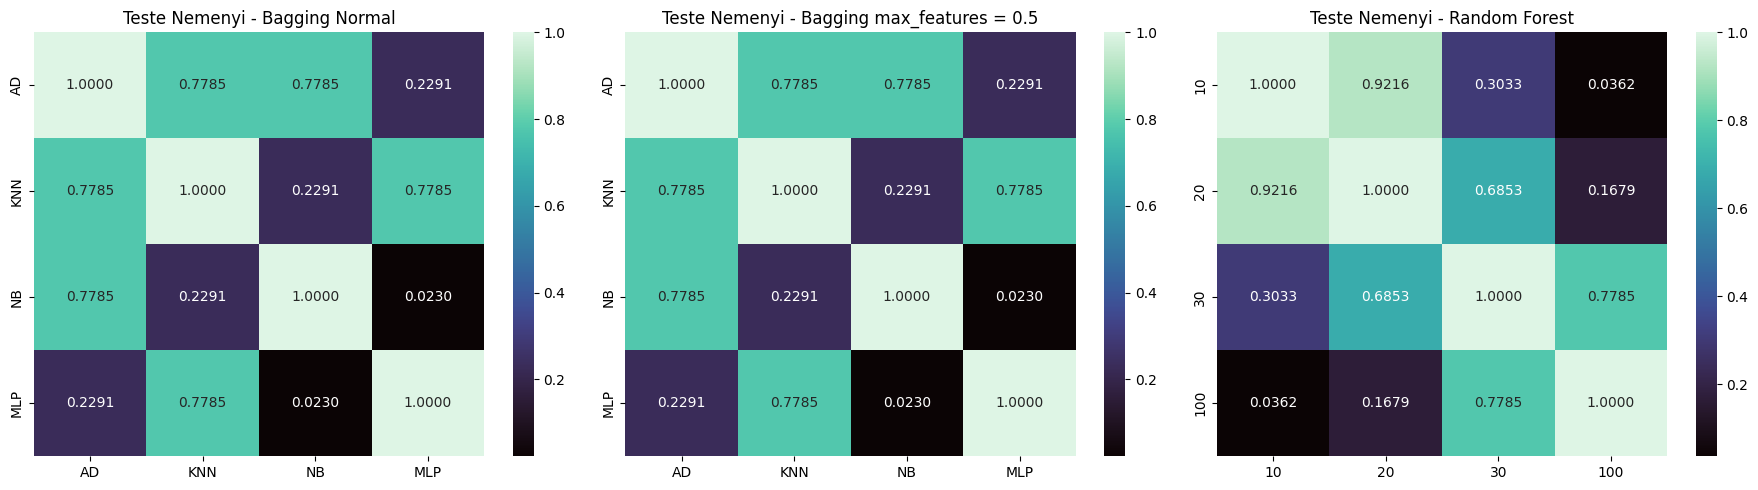

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados para o gráfico de comparação entre os testes de Nemenyi
# Bagging Normal
data_bagging_normal = {
    "AD": [1.000000, 0.778483, 0.778483, 0.229104],
    "KNN": [0.778483, 1.000000, 0.229104, 0.778483],
    "NB": [0.778483, 0.229104, 1.000000, 0.022956],
    "MLP": [0.229104, 0.778483, 0.022956, 1.000000],
}

df_bagging_normal = pd.DataFrame(data_bagging_normal, index=["AD", "KNN", "NB", "MLP"])

# Bagging com 0.5 max_features
data_bagging_max_features = {
    "AD": [1.000000, 0.778483, 0.778483, 0.229104],
    "KNN": [0.778483, 1.000000, 0.229104, 0.778483],
    "NB": [0.778483, 0.229104, 1.000000, 0.022956],
    "MLP": [0.229104, 0.778483, 0.022956, 1.000000],
}

df_bagging_max_features = pd.DataFrame(data_bagging_max_features, index=["AD", "KNN", "NB", "MLP"])

# Random Forest Gini, Entropy, Log-loss
data_rf = {
    "10": [1.000000, 0.921603, 0.303273, 0.036176],
    "20": [0.921603, 1.000000, 0.685342, 0.167936],
    "30": [0.303273, 0.685342, 1.000000, 0.778483],
    "100": [0.036176, 0.167936, 0.778483, 1.000000],
}

df_rf = pd.DataFrame(data_rf, index=["10", "20", "30", "100"])

# Plotando os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bagging Normal
sns.heatmap(df_bagging_normal, annot=True, cmap=sns.color_palette("mako", as_cmap=True), fmt=".4f", ax=axes[0])
axes[0].set_title('Teste Nemenyi - Bagging Normal')

# Bagging com 0.5 max_features
sns.heatmap(df_bagging_max_features, annot=True, cmap=sns.color_palette("mako", as_cmap=True), fmt=".4f", ax=axes[1])
axes[1].set_title('Teste Nemenyi - Bagging max_features = 0.5')

# Random Forest
sns.heatmap(df_rf, annot=True, cmap=sns.color_palette("mako", as_cmap=True), fmt=".4f", ax=axes[2])
axes[2].set_title('Teste Nemenyi - Random Forest')

# Ajustar layout
plt.tight_layout()
plt.show()


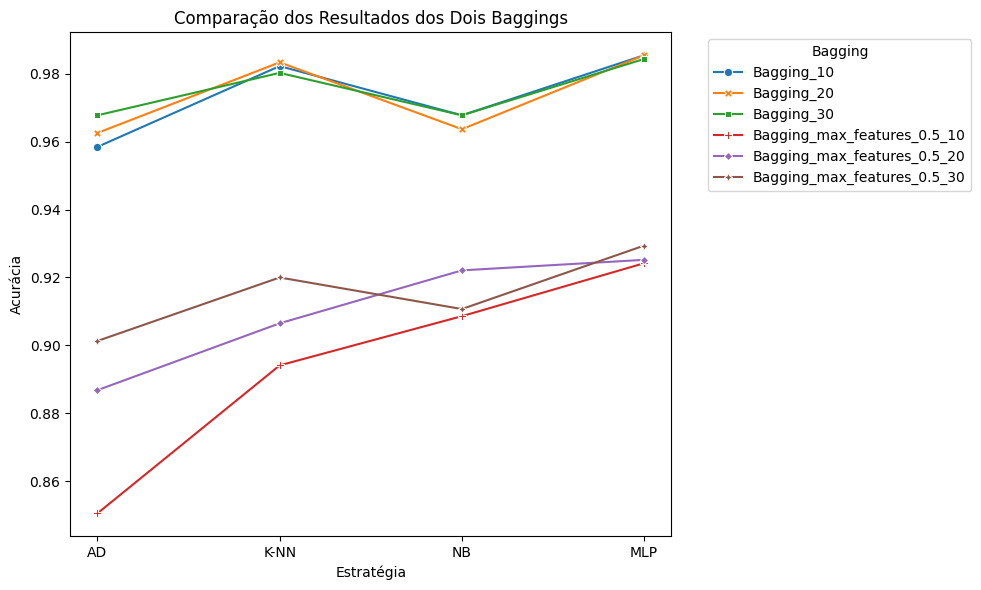

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    'Estratégia': ['AD', 'K-NN', 'NB', 'MLP'],
    'Bagging_10': [0.9585, 0.9823, 0.9678, 0.9855],
    'Bagging_20': [0.9626, 0.9834, 0.9637, 0.9855],
    'Bagging_30': [0.9678, 0.9803, 0.9678, 0.9844],
    'Bagging_max_features_0.5_10': [0.8505, 0.8941, 0.9086, 0.9242],
    'Bagging_max_features_0.5_20': [0.8868, 0.9065, 0.9221, 0.9252],
    'Bagging_max_features_0.5_30': [0.9013, 0.9200, 0.9107, 0.9294]
}

data = {
    'Estratégia': ['AD', 'K-NN', 'NB', 'MLP'],
    'Bagging_10': df_bagging_normal.loc[10].values,
    'Bagging_20': df_bagging_normal.loc[20].values,
    'Bagging_30': df_bagging_normal.loc[30].values,
    'Bagging_max_features_0.5_10': df_bagging_mf_05.loc[10].values,
    'Bagging_max_features_0.5_20': df_bagging_mf_05.loc[20].values,
    'Bagging_max_features_0.5_30': df_bagging_mf_05.loc[30].values
}

# Criar DataFrame
df = pd.DataFrame(data)

# Derreter DataFrame para formato longo
df_melted = df.melt(id_vars='Estratégia', var_name='Bagging', value_name='Acurácia')

# Criar o line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Estratégia', y='Acurácia', hue='Bagging', style='Bagging', markers=True, dashes=False, data=df_melted)
plt.title('Comparação dos Resultados dos Dois Baggings')
plt.xlabel('Estratégia')
plt.ylabel('Acurácia')
plt.legend(title='Bagging', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



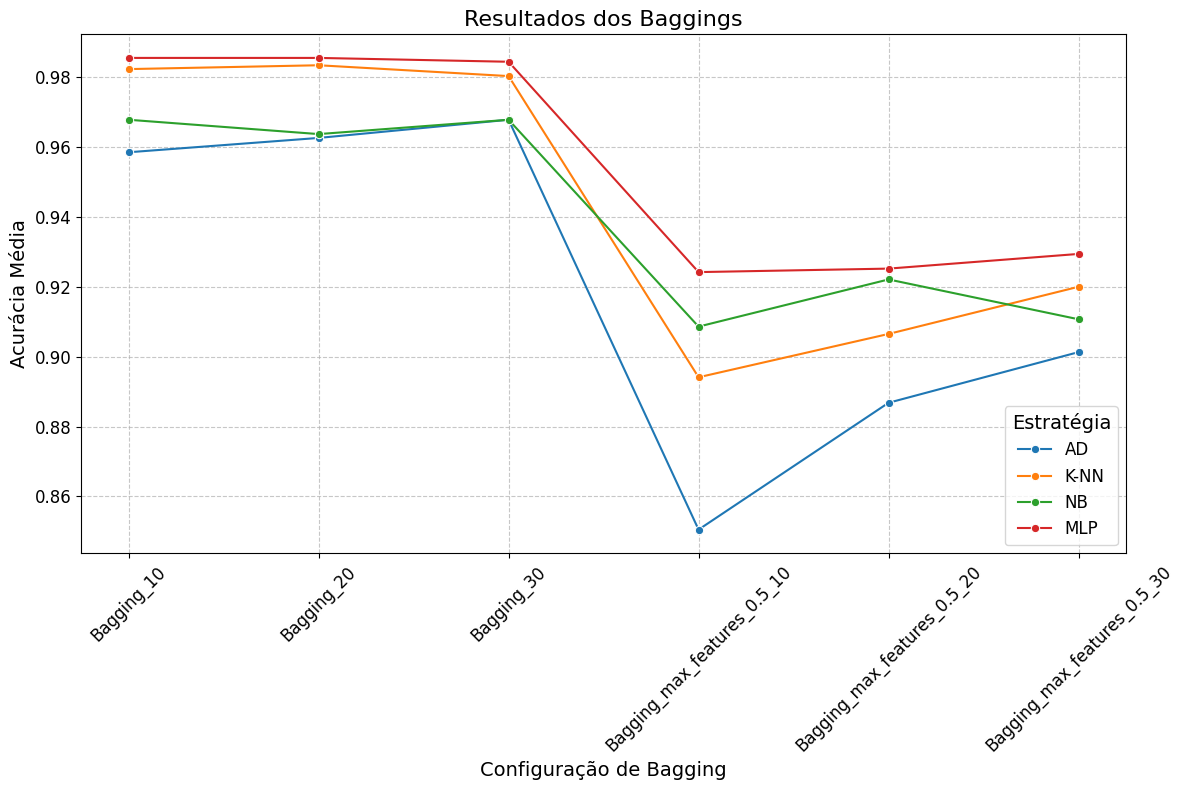

In [ ]:
# Preparação dos dados para o gráfico de bagging
data = {
    'Estratégia': ['AD', 'K-NN', 'NB', 'MLP'],
    'Bagging_10': df_bagging_normal.loc[10].values,
    'Bagging_20': df_bagging_normal.loc[20].values,
    'Bagging_30': df_bagging_normal.loc[30].values,
    'Bagging_max_features_0.5_10': df_bagging_mf_05.loc[10].values,
    'Bagging_max_features_0.5_20': df_bagging_mf_05.loc[20].values,
    'Bagging_max_features_0.5_30': df_bagging_mf_05.loc[30].values
}

df = pd.DataFrame(data)

# Derreter DataFrame para formato longo
df_melted = df.melt(id_vars='Estratégia', var_name='Bagging', value_name='Acurácia')

# Configuração do gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='Bagging', y='Acurácia', hue='Estratégia', marker='o')

# Personalização do gráfico
plt.title('Resultados dos Baggings', fontsize=16)
plt.xlabel('Configuração de Bagging', fontsize=14)
plt.ylabel('Acurácia Média', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Estratégia', fontsize=12, title_fontsize=14, loc='lower right')
plt.tight_layout()

# Exibir o gráfico
plt.show()

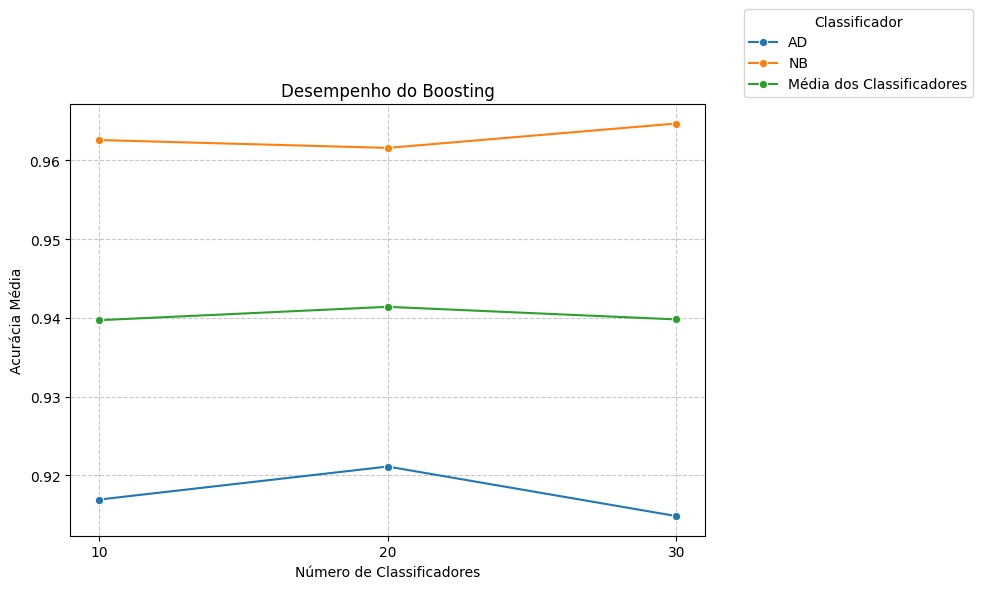

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Número de Classificadores': [10, 20, 30],
    'AD': [0.9169, 0.9211, 0.9148],
    'NB': [0.9626, 0.9616, 0.9647],
    'Média dos Classificadores': [0.9397, 0.9414, 0.9398]
}

df = pd.DataFrame(data)
df_long = df.melt(id_vars=['Número de Classificadores'],
                 var_name='Classificador',
                 value_name='Acurácia')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long,
            x='Número de Classificadores',
            y='Acurácia',
            hue='Classificador',
            marker='o')

plt.title('Desempenho do Boosting')
plt.xlabel('Número de Classificadores')
plt.ylabel('Acurácia Média')
plt.grid(True, linestyle='--', alpha=0.7)
#mudar posicap da legenda
plt.legend(title='Classificador', bbox_to_anchor=(1.05, 1), loc='lower left')

plt.xticks([10, 20, 30])
plt.tight_layout()
plt.show()

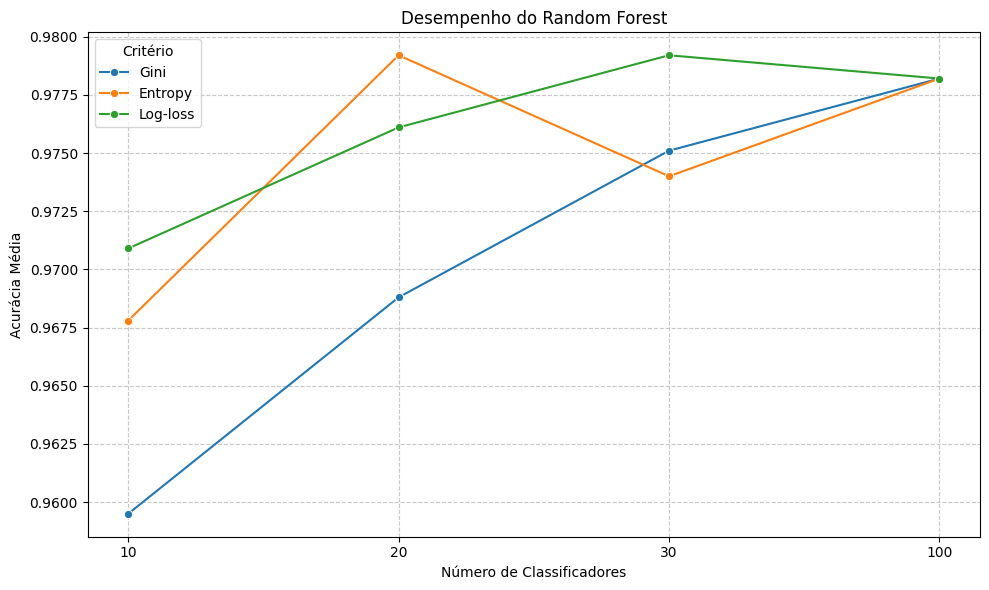

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_random_forest = pd.DataFrame({
    "10": [0.9595, 0.9678, 0.9709],
    "20": [0.9688, 0.9792, 0.9761],
    "30": [0.9751, 0.9740, 0.9792],
    "100": [0.9782, 0.9782, 0.9782]
}, index=["Gini", "Entropy", "Log-loss"])

df_rf_melted = pd.melt(df_random_forest.reset_index(),
                      id_vars='index',
                      var_name='Número de Classificadores',
                      value_name='Acurácia')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rf_melted,
            x='Número de Classificadores',
            y='Acurácia',
            hue='index',
            marker='o')

plt.title('Desempenho do Random Forest')
plt.xlabel('Número de Classificadores')
plt.ylabel('Acurácia Média')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Critério')

plt.xticks([0, 1, 2, 3], ['10', '20', '30', '100'])
plt.tight_layout()
plt.show()

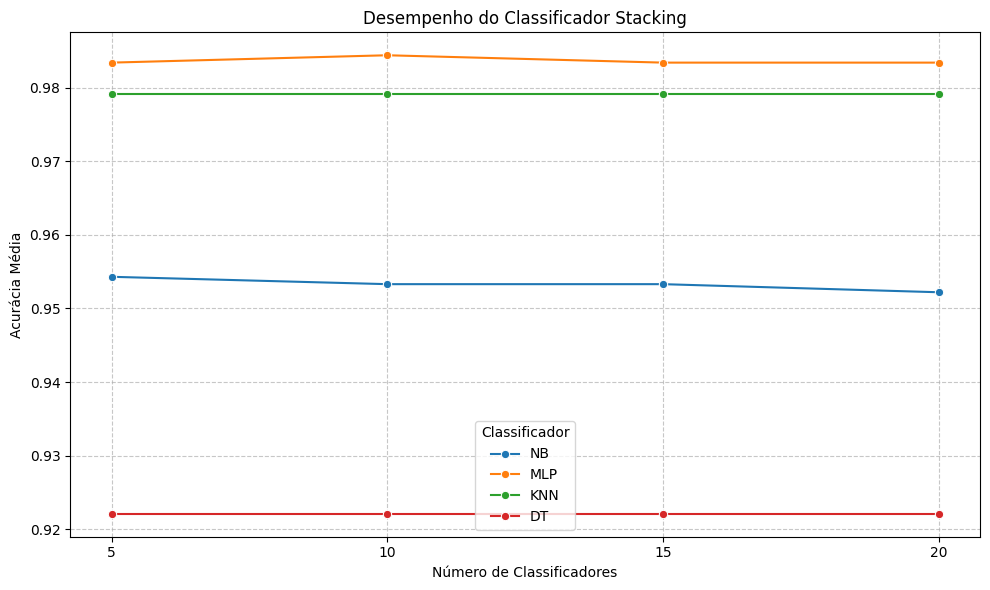

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados fornecidos
data = {
    'Número de Classificadores': [5, 10, 15, 20],
    'NB': [0.9543, 0.9533, 0.9533, 0.9522],
    'MLP': [0.9834, 0.9844, 0.9834, 0.9834],
    'KNN': [0.9792, 0.9792, 0.9792, 0.9792],
    'DT': [0.9221, 0.9221, 0.9221, 0.9221]
}

df = pd.DataFrame(data)
df_long = df.melt(id_vars=['Número de Classificadores'],
                 var_name='Classificador',
                 value_name='Acurácia')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long,
            x='Número de Classificadores',
            y='Acurácia',
            hue='Classificador',
            marker='o')

plt.title('Desempenho do Classificador Stacking')
plt.xlabel('Número de Classificadores')
plt.ylabel('Acurácia Média')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Classificador')

plt.xticks([5, 10, 15, 20])
plt.tight_layout()
plt.show()

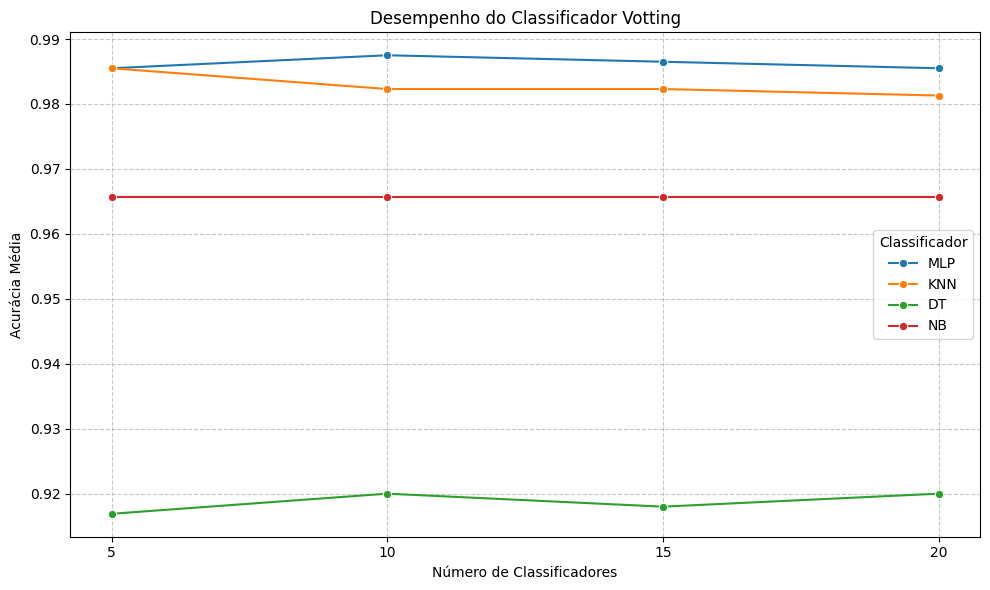

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_long = df_voting.reset_index().melt(id_vars=['index'],
                                     var_name='Classificador',
                                     value_name='Acurácia')
df_long = df_long.rename(columns={'index': 'Número de Classificadores'})

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long,
            x='Número de Classificadores',
            y='Acurácia',
            hue='Classificador',
            marker='o')

plt.title('Desempenho do Classificador Votting')
plt.xlabel('Número de Classificadores')
plt.ylabel('Acurácia Média')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Classificador')

plt.xticks([5, 10, 15, 20])
plt.tight_layout()
plt.show()